In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis
## Shape analysis
- **Shape** : 380 lines, 12 columns
- **variables types** : qualitative variable : 2, quantitative variable : 10
- **Nan** : No missing values
## Background analysis
- **Target** :  global (56 % of *over 2,5* class)
- **Variables meaning**: 
    * Data distribution are not Gaussian; did follow a poisson distribution ?
    * We observe that for most team, there is a difference (mode, std, mean, outliers) between values recorded at home and these recorded at away.
    * In a match, the team result is closely tied with other team result
    
- **Target / Feature relationship** : 
    `We know that the target is in fact the sum between scored and conceded.`
    * Target / Scored: The relationship between our two variables are positively correlated,\
    though for certain teams, there's either a week or no relationship.
    * Target / Conceded: same point of view like before.\
    It seems like match results might be highly correlated with the result of one team only (the strongest ?)
    ```
    Since the match results are highly correlated with the results of one team only, other team result are not\
    correlated with the match results.
    ```

- **Feature / Feature relationship**:
    * Scored / Conceded : low correlation, négative.
    
- **Conclusion initial**: We divide the team in two groups:
    * Strong team ( which the match result depend more, cause of their offensive and defensive force)\
     there's a hight positive correlation between the goal they scored and the final result of the match.
    * weak team (whom conceded more than they scored) witch the final result depend more of the adversaire.\
    There's a high correlation between the final result and their goal conceded.   

## Detailed analysis
- **bad attack | good defense**
    * Teams whom scored less and conceded less (under 1,5) have balanced classes in which we can find as much `under` than `over` 

## Hypothèses H0:
 - If the match is about a strong team( good attack, good defense) and a weak team (bad attack; defense), the match result is highly correlated with the strong team result (scored)


In [82]:
from pathlib import Path
p = Path.cwd()
p = p.parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(p, index_col='date_time', parse_dates=True)
df.head()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38         PSG     Clermont                   2   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   2               4                   0   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   0               1                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               1                     2   

                     total_away_team_goal  global  
date_time                                          
2023-06-03 19:00:00                     0       1  
2023-06-03 19:00:00                     1       4  
2023-06-03 19:00:00                     1       2  
2023-06-03 19:00:00                     3       4  
2023-06-03 19:00:00                     3       5

In [83]:
df.shape

(380, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2023-06-03 19:00:00 to 2022-08-05 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   journée               380 non-null    int64 
 1   home_team             380 non-null    object
 2   away_team             380 non-null    object
 3   1st_home_team_goal    380 non-null    int64 
 4   1st_away_team_goal    380 non-null    int64 
 5   1st_total_goal        380 non-null    int64 
 6   2nd_home_team_goal    380 non-null    int64 
 7   2nd_away_team_goal    380 non-null    int64 
 8   2nd_total_goal        380 non-null    int64 
 9   total_home_team_goal  380 non-null    int64 
 10  total_away_team_goal  380 non-null    int64 
 11  global                380 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 38.6+ KB


In [85]:
# drop columns who won't be part of a study
df.drop(['1st_home_team_goal', '1st_away_team_goal', '1st_total_goal',
         '2nd_home_team_goal', '2nd_away_team_goal', '2nd_total_goal'],
         axis=1, inplace=True)

In [86]:
# show some descriptive stats
print(f"total goal: {df['global'].sum()}")
print(f"average goal per match: {df['global'].mean()}")
print(f"goals scored by home team / conceded by away team: {df['total_home_team_goal'].sum()}")
print(f"goals conceded by home team / scored by away team: {df['total_away_team_goal'].sum()}")

total goal: 1067
average goal per match: 2.807894736842105
goals scored by home team / conceded by away team: 566
goals conceded by home team / scored by away team: 501


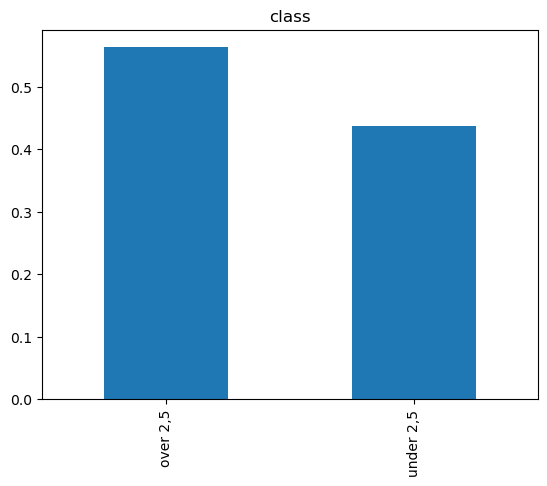

In [87]:
plt.figure()
labels_name = ['under 2,5', 'over 2,5']
df['class'] = pd.cut(x=df['global'], bins=[min(df['global']), 2, max(df['global'])],
       labels=labels_name, include_lowest=True)
df['class'].value_counts(normalize=True).plot.bar()
plt.title('class')
plt.show()


In [88]:
df.columns

Index(['journée', 'home_team', 'away_team', 'total_home_team_goal',
       'total_away_team_goal', 'global', 'class'],
      dtype='object')

In [89]:
dico = {'total_home_team_goal': 'home_team_scored',
        'total_away_team_goal': 'home_team_conceded'}
df.rename(columns=dico, inplace=True)
df['away_team_scored'] = df['home_team_conceded']
df['away_team_conceded'] = df['home_team_scored']
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

### Data Visualisation

In [90]:

def target_viz(data, feature, team):
    """Return for home and away matchs 
    the distribution of a given feature 

    Args:
        data : Dataframe
        feature : the name of the column we want to visualize
        team : the team we want to observe the data
    """
    at_home = data[data['home_team']==team]
    at_away = data[data['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,7))
    sns.histplot(data=at_home, x=at_home[feature], kde=True, ax=axs[0],
                 discrete=True, hue=pd.cut(x=at_home['global'], bins=[min(at_home['global']), 2, max(at_home['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True))
    sns.histplot(data=at_away, x=at_away[feature], kde=True, ax=axs[1],
                 discrete=True, hue=pd.cut(x=at_away['global'], bins=[min(at_away['global']), 2, max(at_away['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True))
    axs[0].set_xlabel(f'{feature} at home')
    axs[1].set_xlabel(f'{feature} at home')
    plt.suptitle(team)
    plt.show()

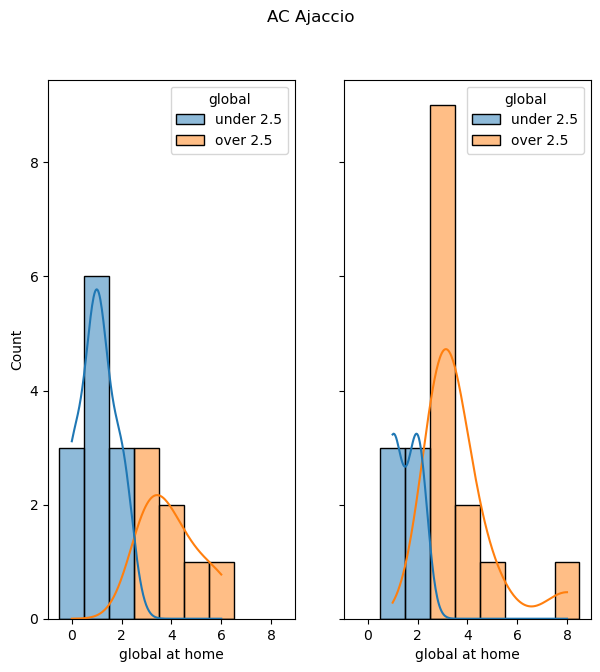

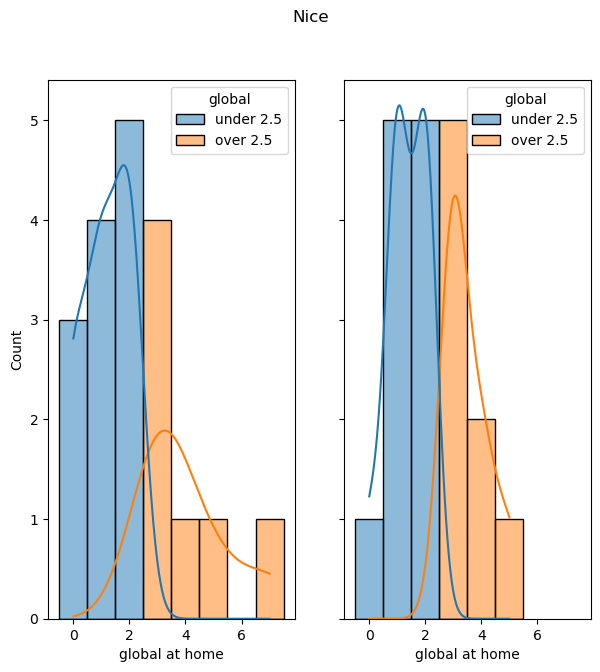

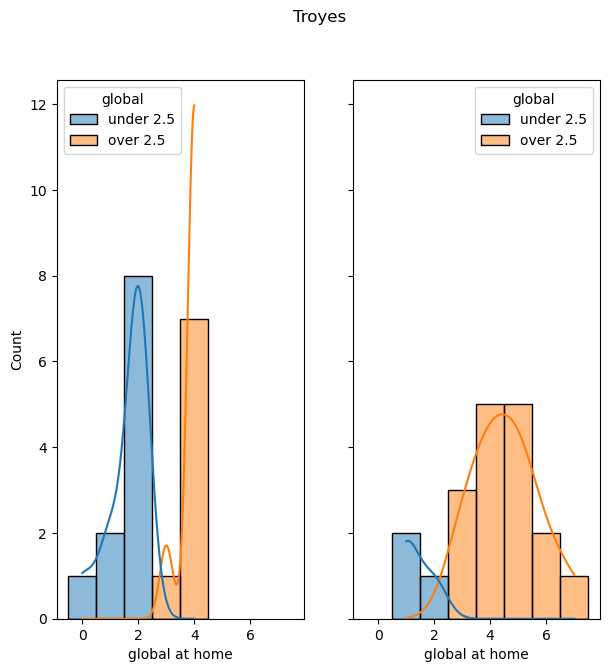

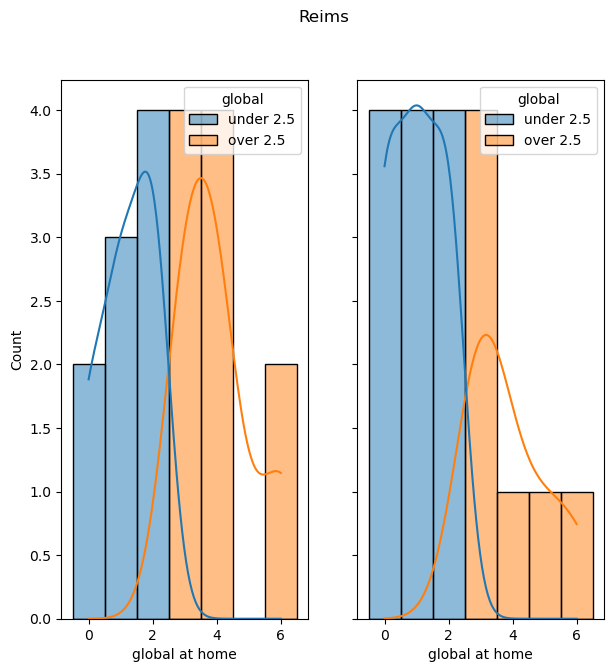

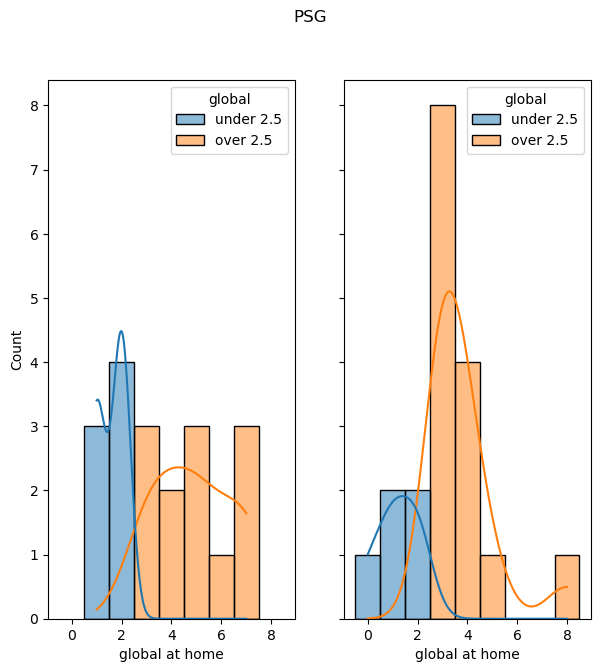

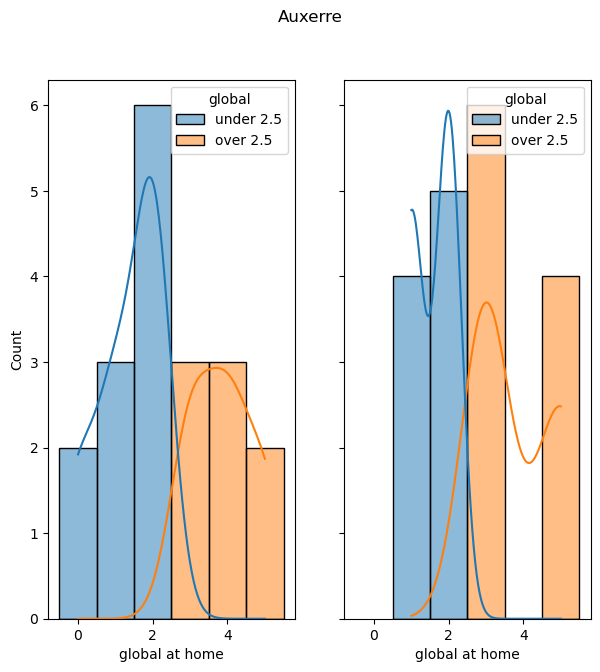

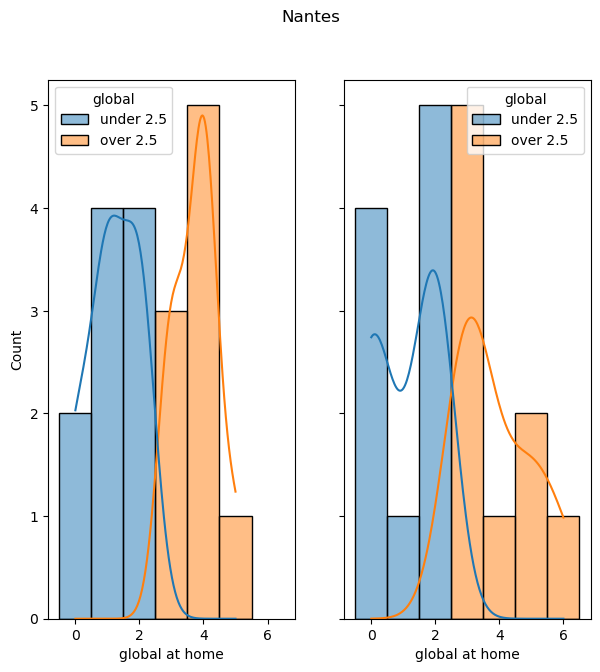

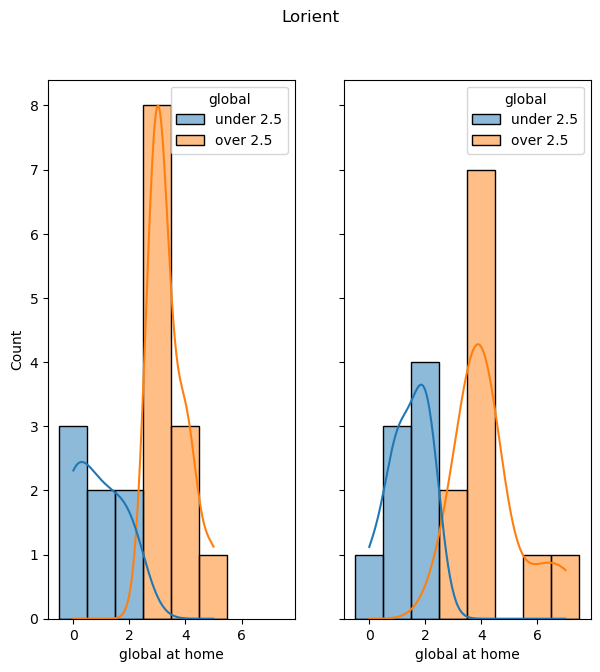

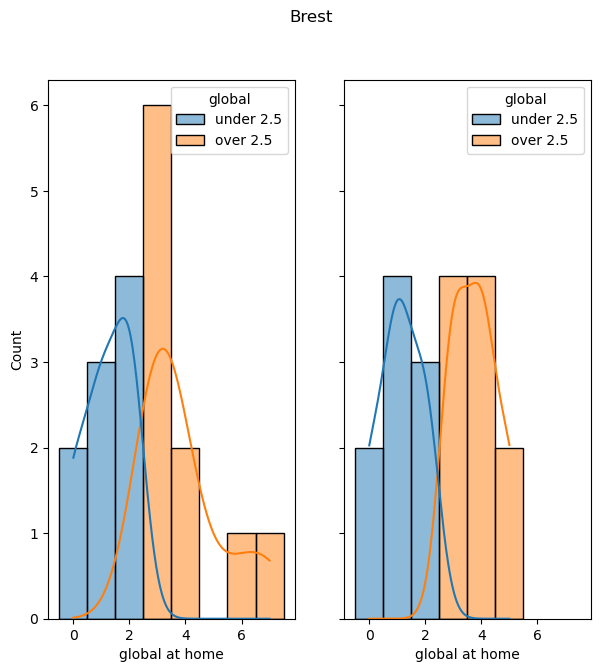

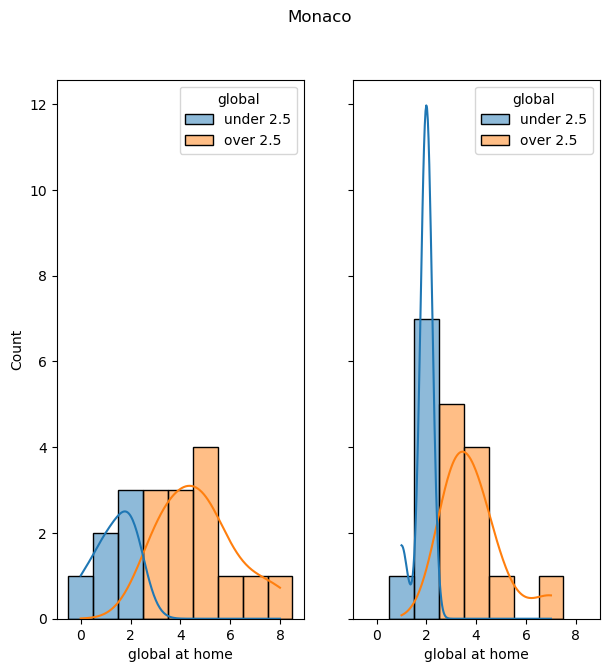

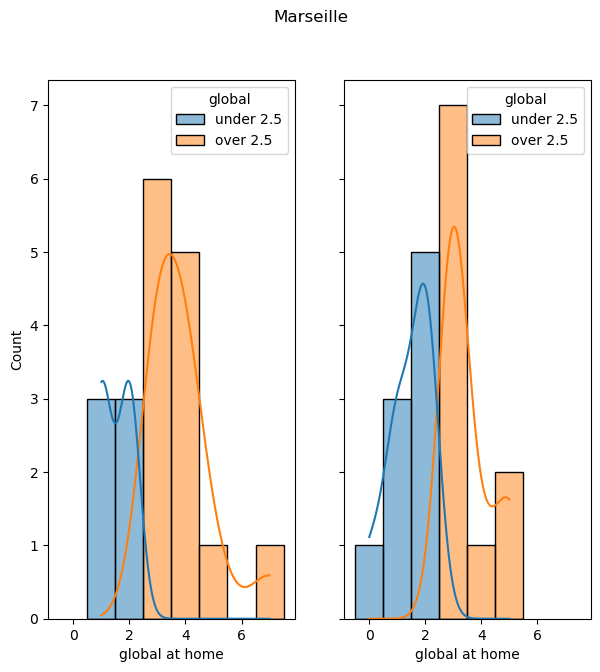

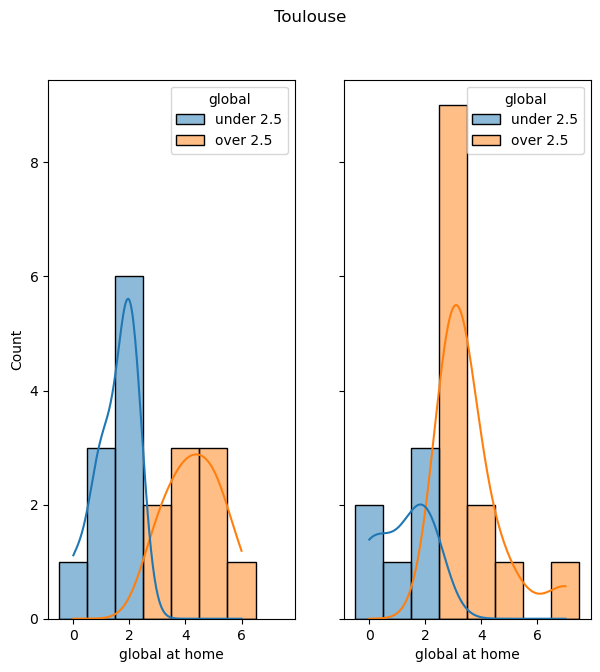

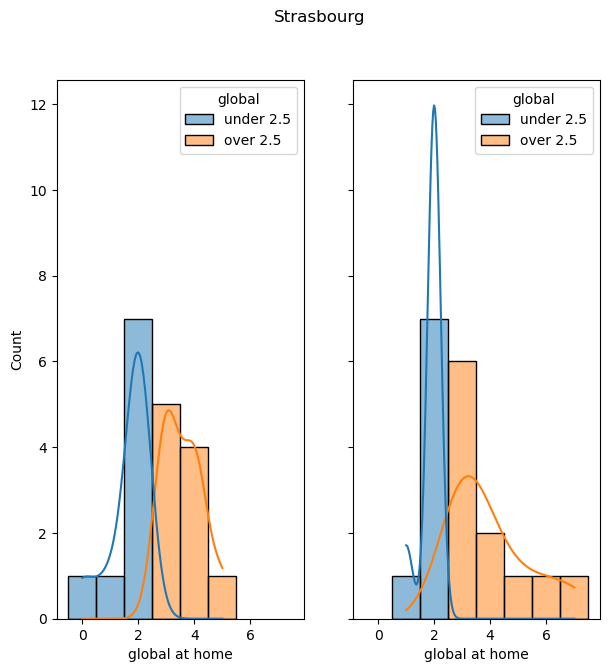

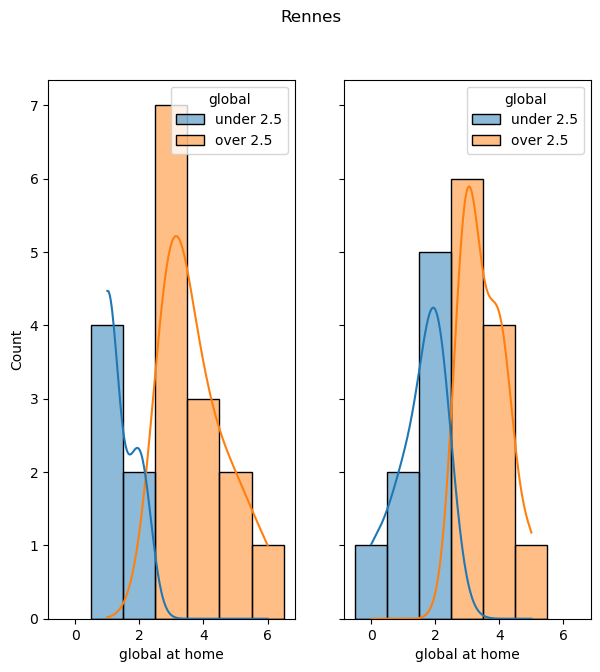

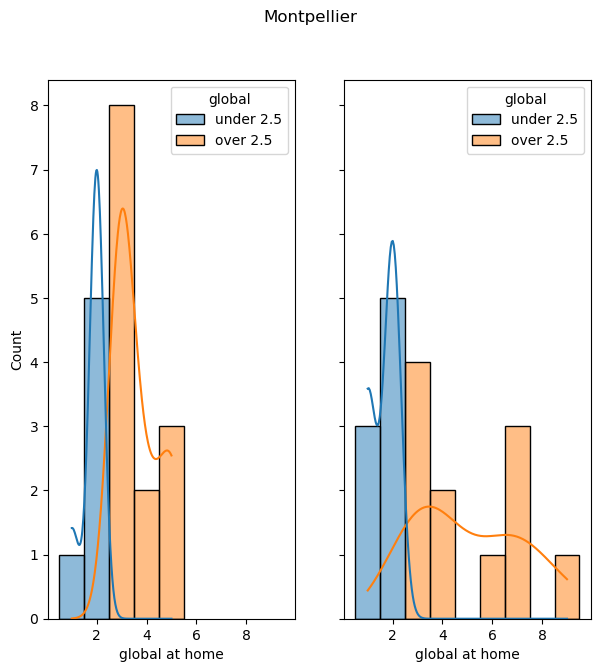

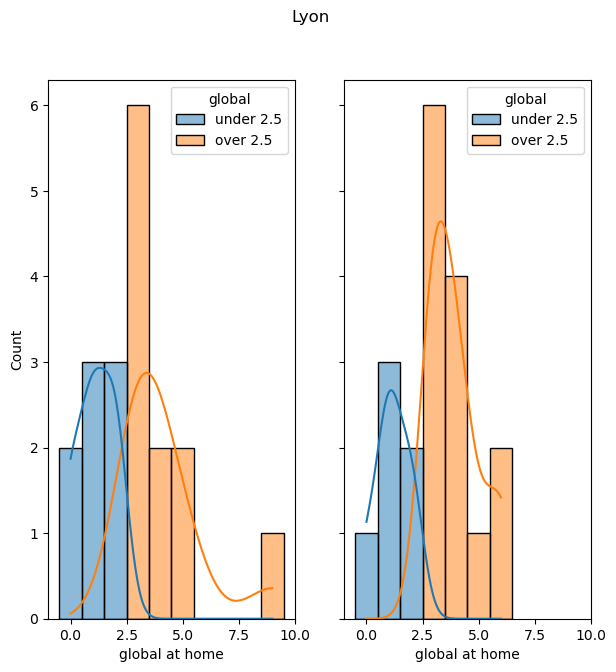

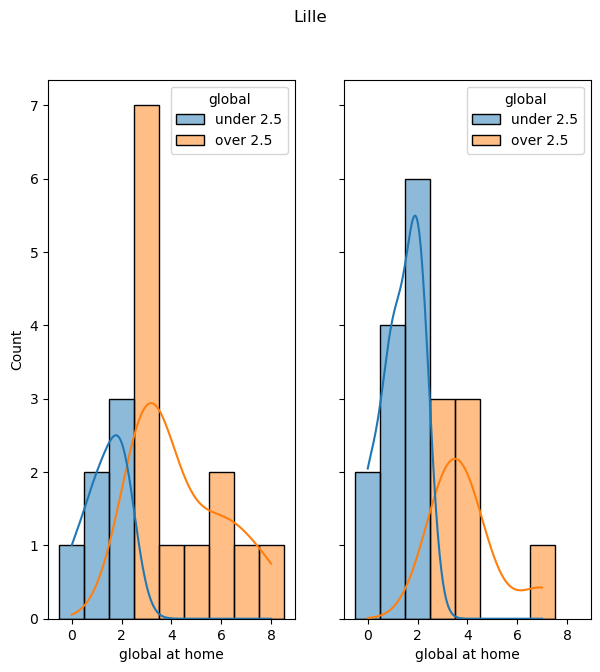

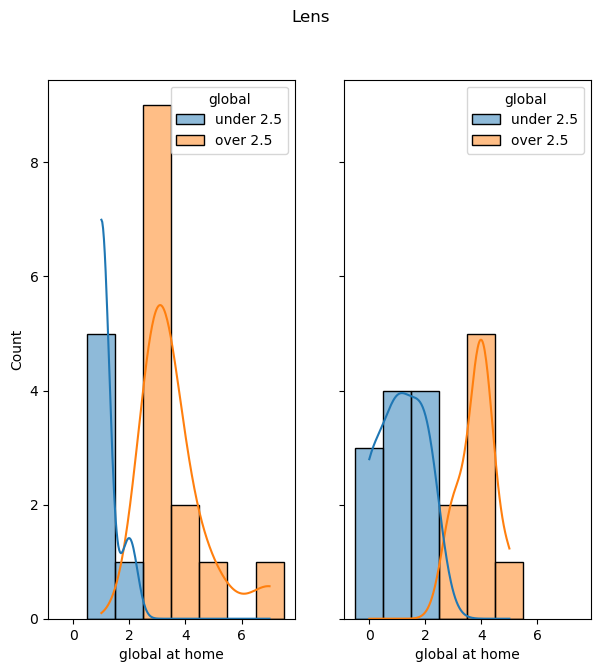

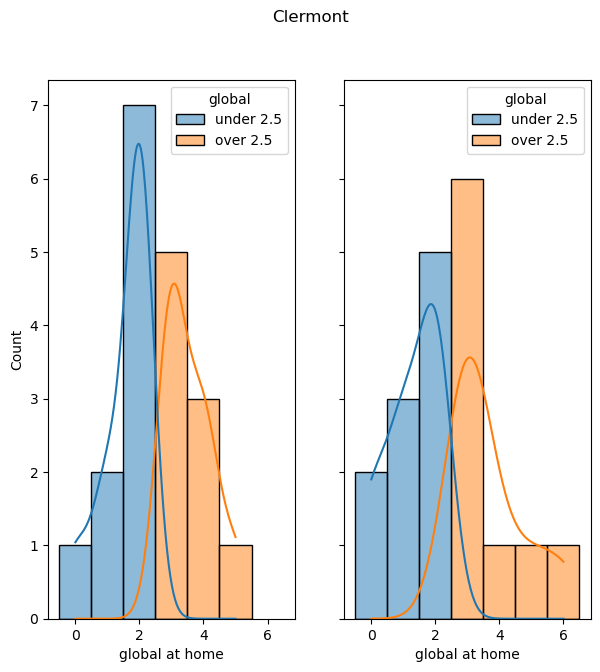

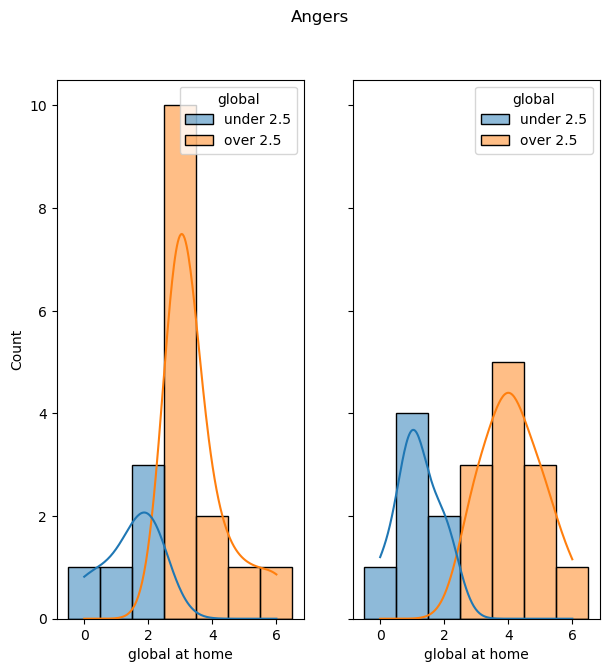

In [91]:
for team in df.home_team.unique():
    target_viz(df, feature='global', team=team)

In [92]:
def feature_viz(team, feature):
    """_summary_

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    at_home = df[df['home_team']==team]
    at_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=at_home, x=at_home[f'home_team_{feature}'], kde=True, ax=axs[0],
                 hue=pd.cut(x=at_home['global'], bins=[min(at_home['global']), 2, max(at_home['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True), discrete=True)
    sns.histplot(data=at_away, x=at_away[f'away_team_{feature}'], kde=True, ax=axs[1],
                 hue=pd.cut(x=at_away['global'], bins=[min(at_away['global']), 2, max(at_away['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True), discrete=True)
    axs[0].set_xlabel(f'{feature} at home')
    axs[1].set_xlabel(f'{feature} at away')
    plt.title(team)
    plt.show()

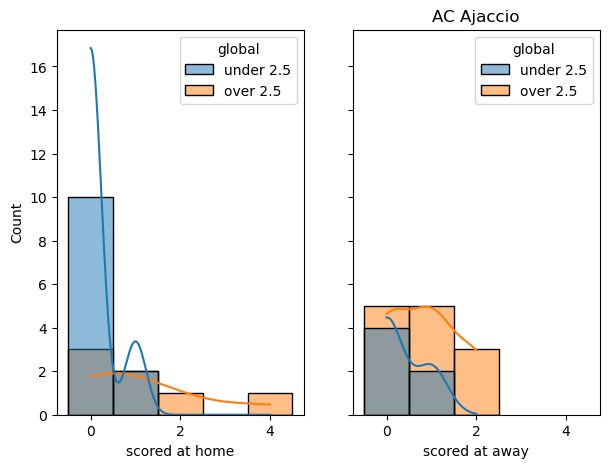

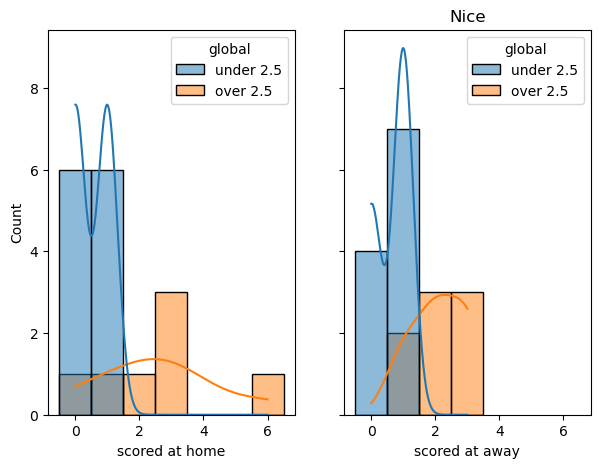

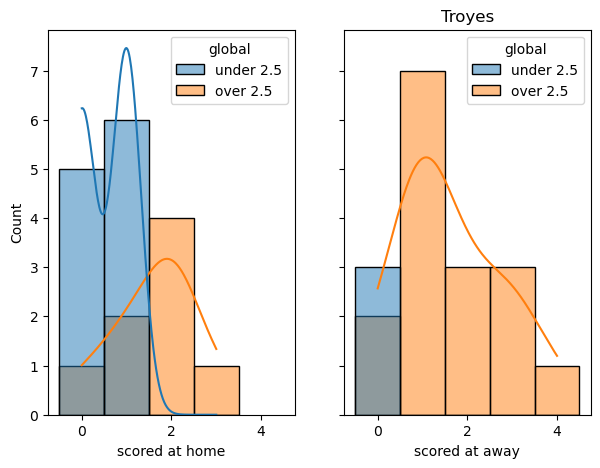

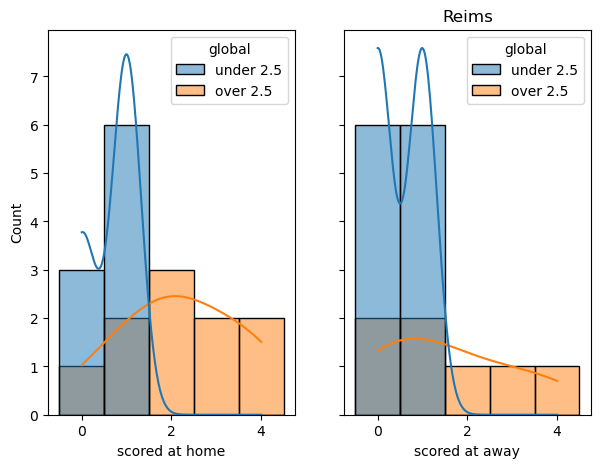

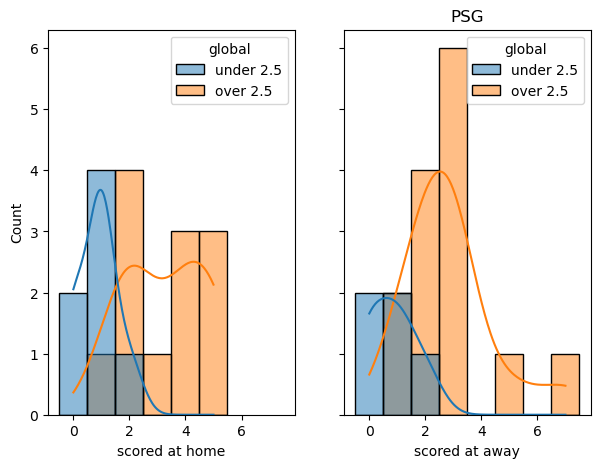

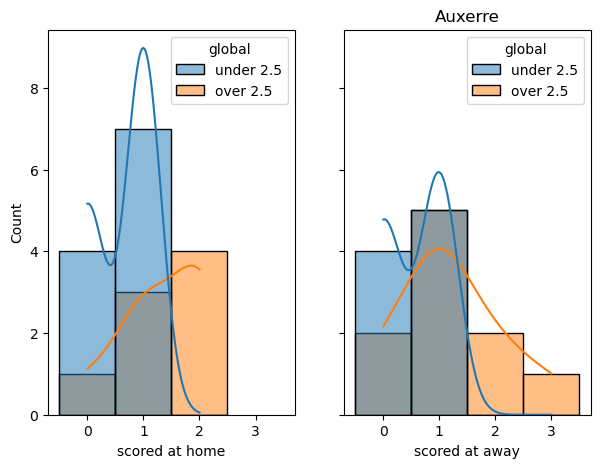

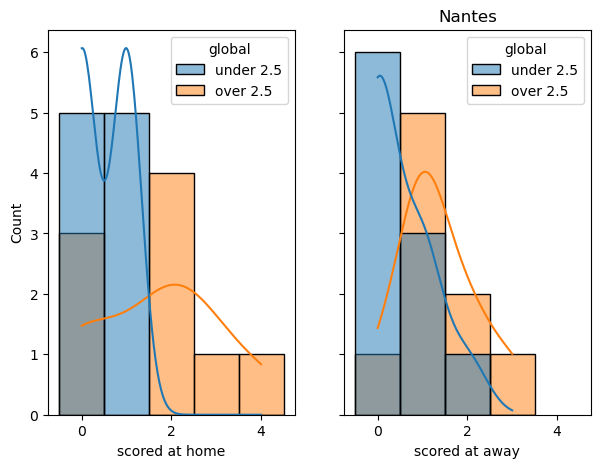

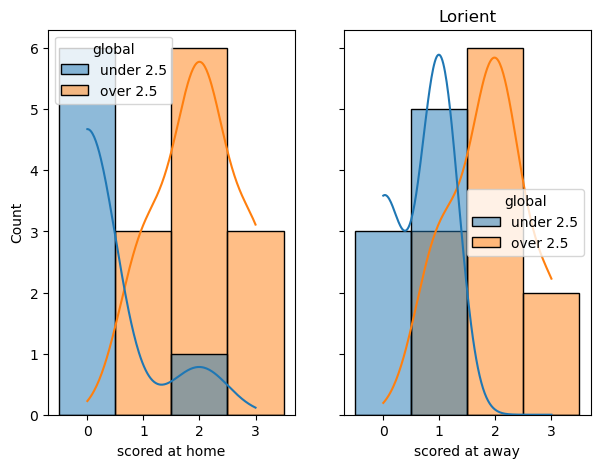

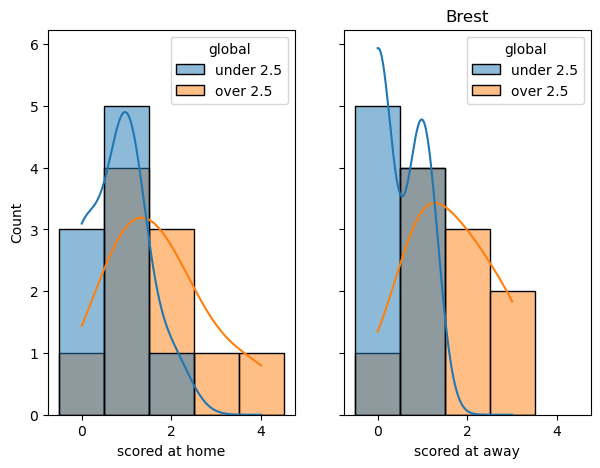

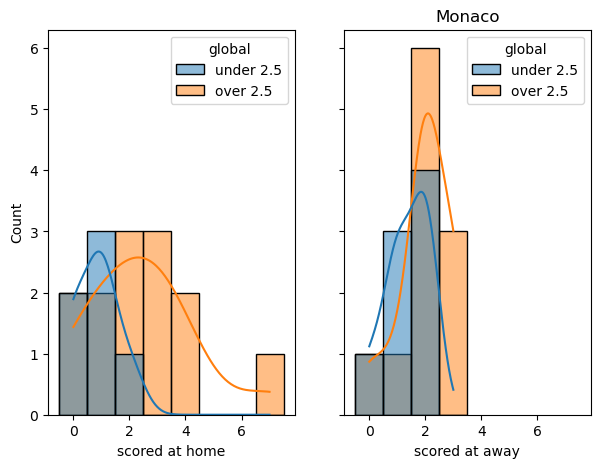

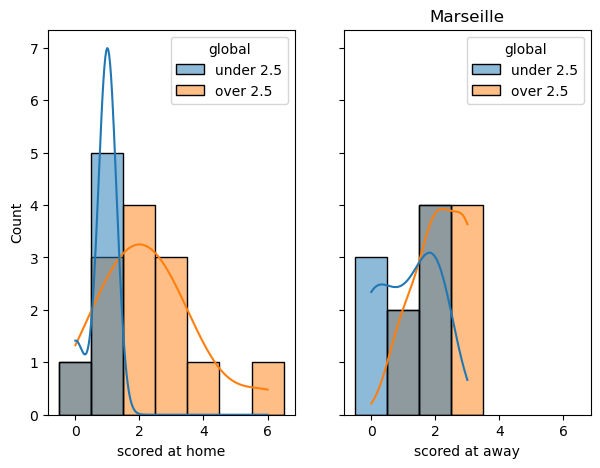

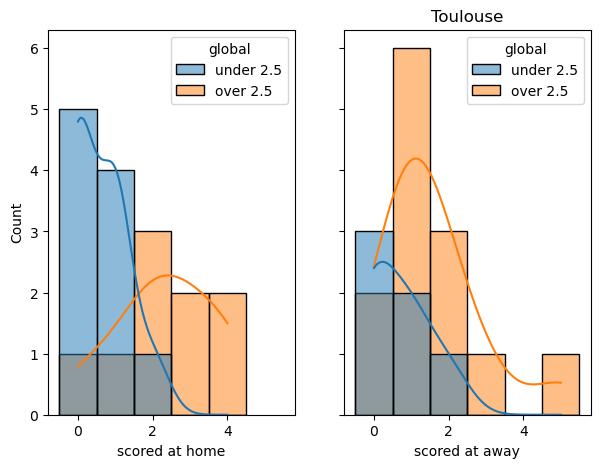

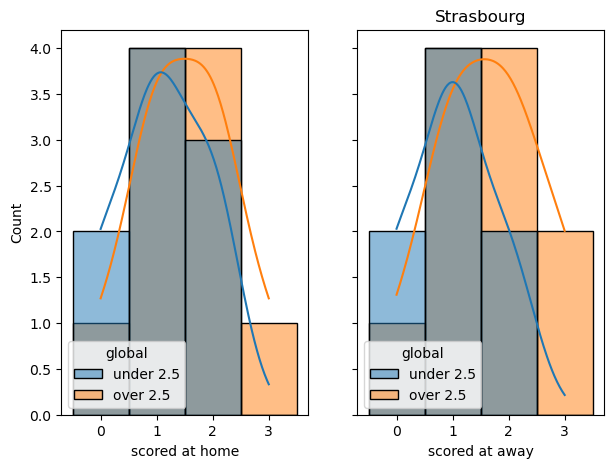

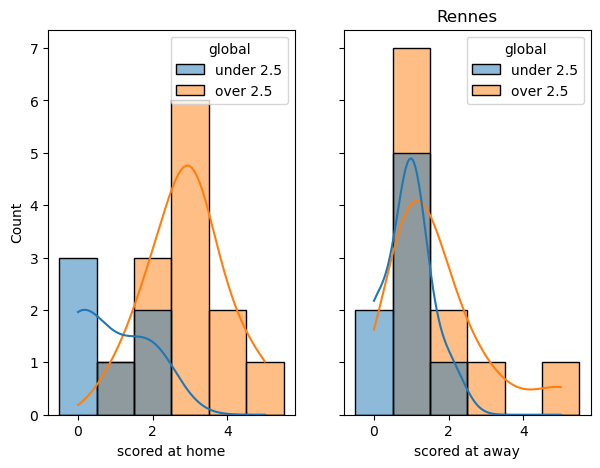

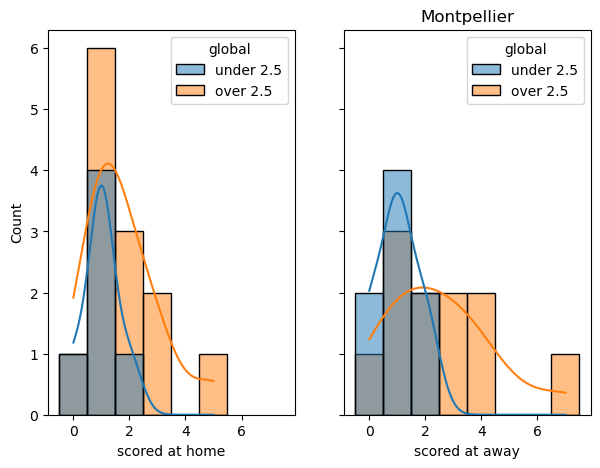

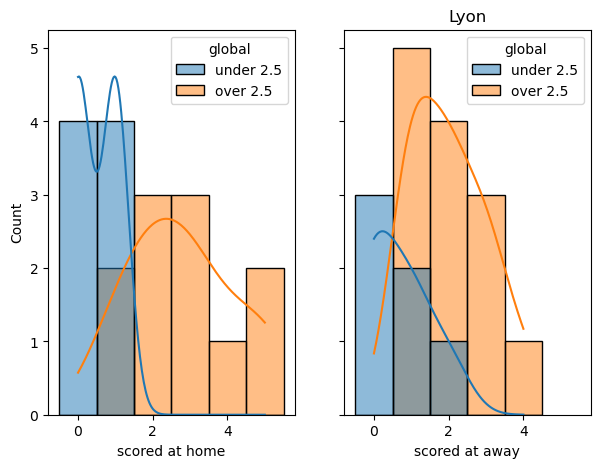

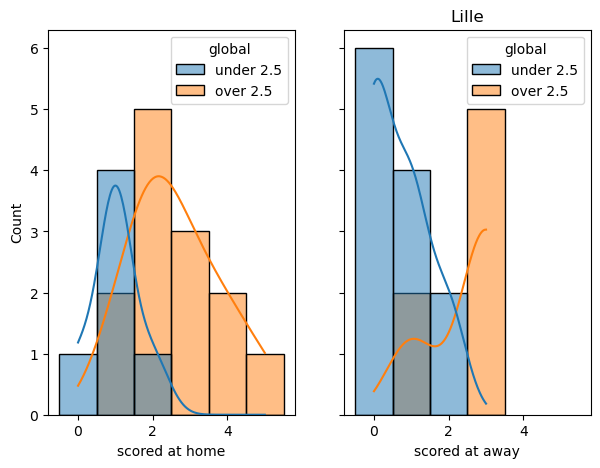

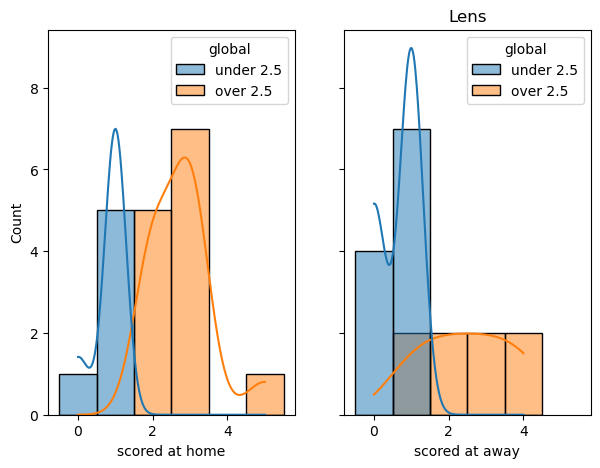

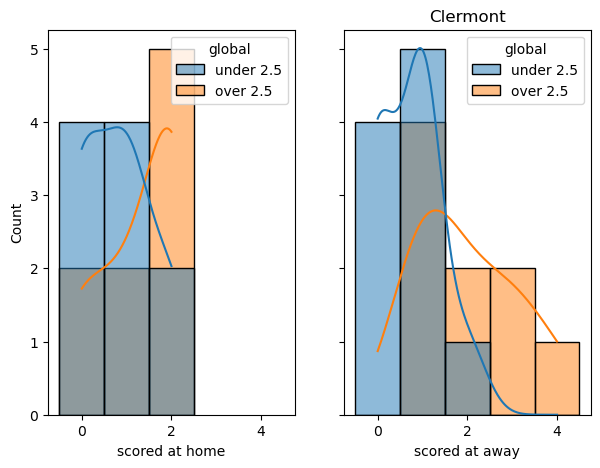

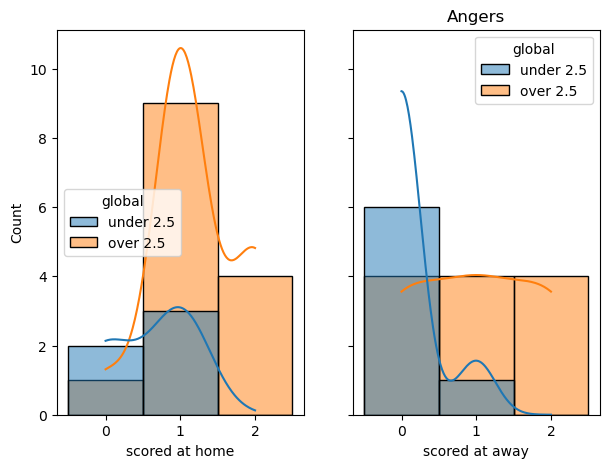

In [93]:
for team in df.home_team.unique():
    feature_viz(team, feature='scored')

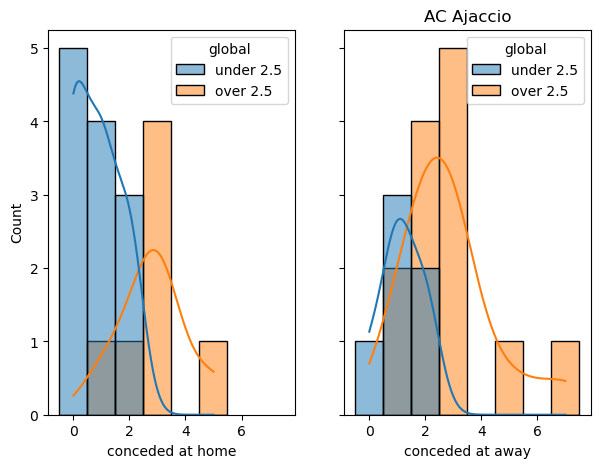

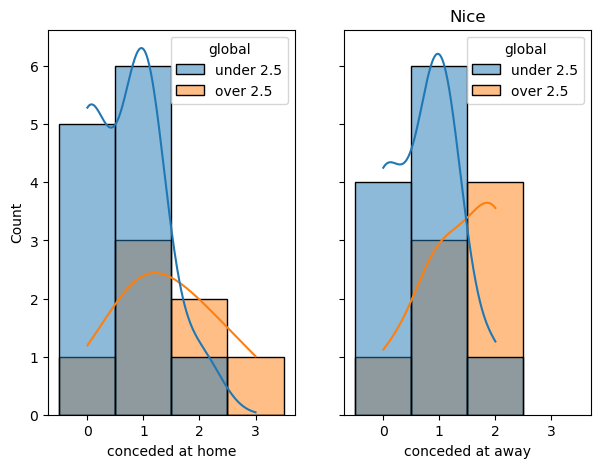

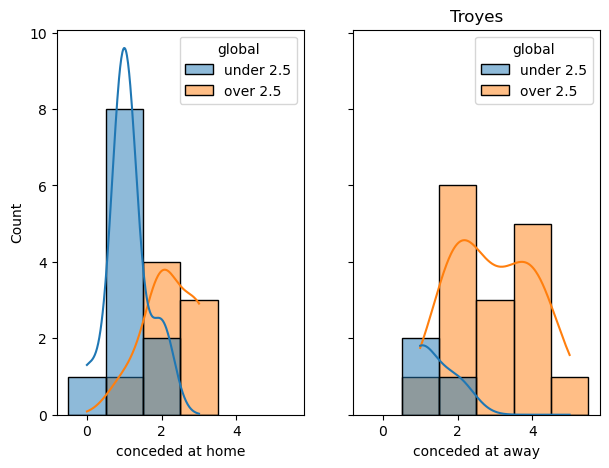

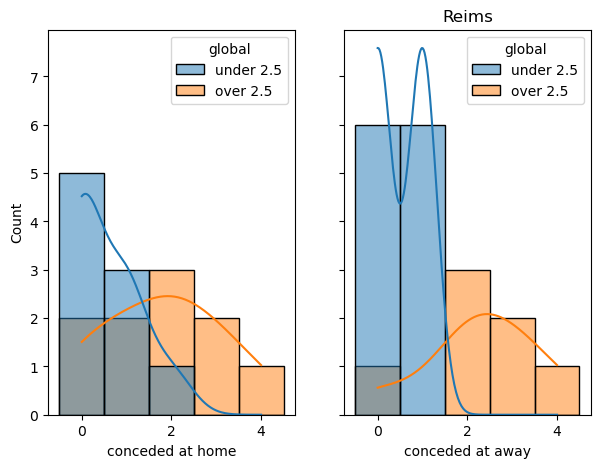

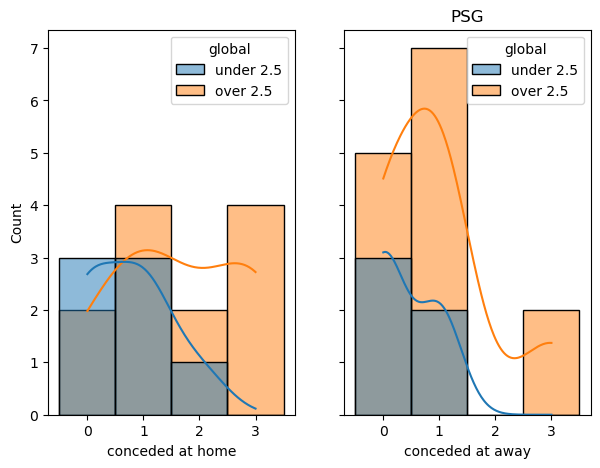

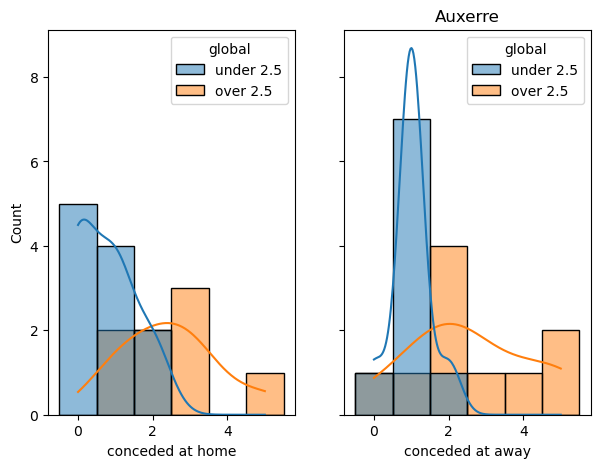

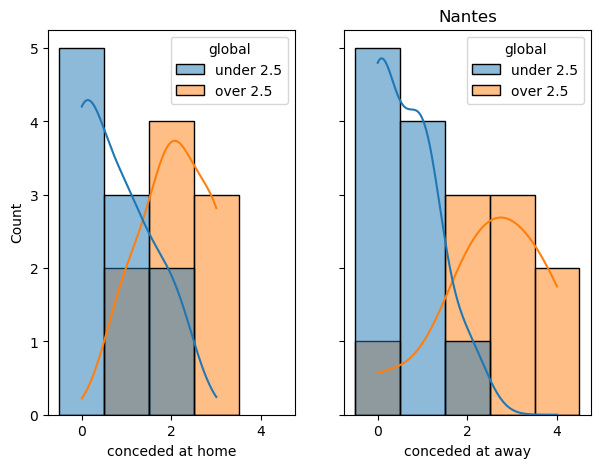

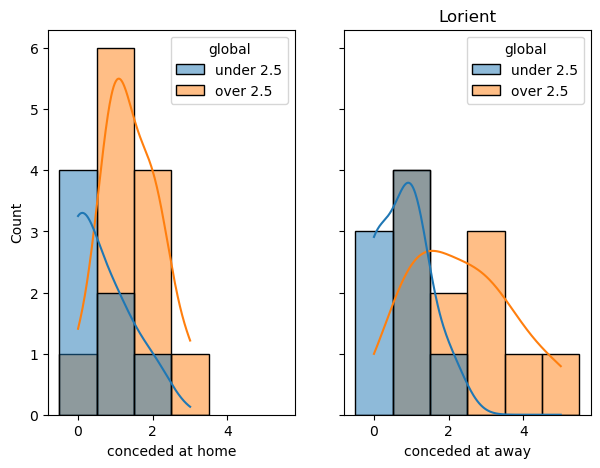

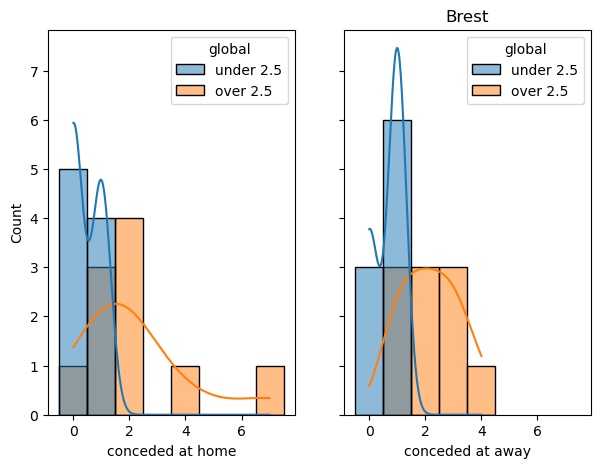

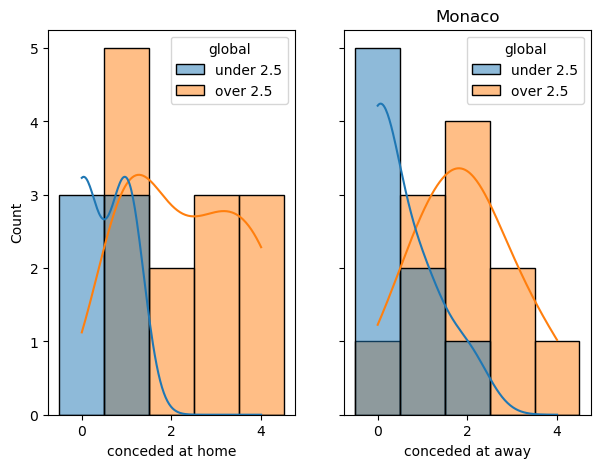

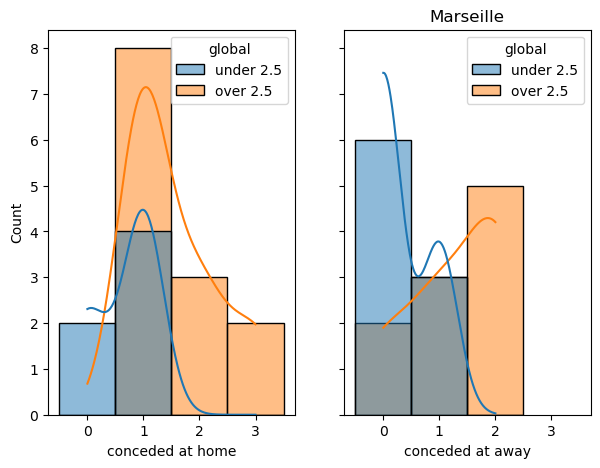

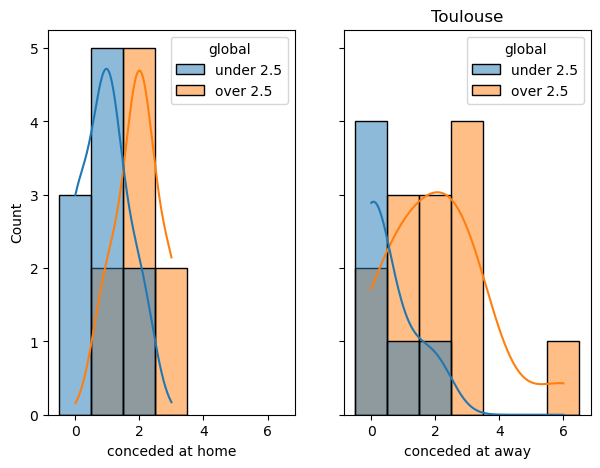

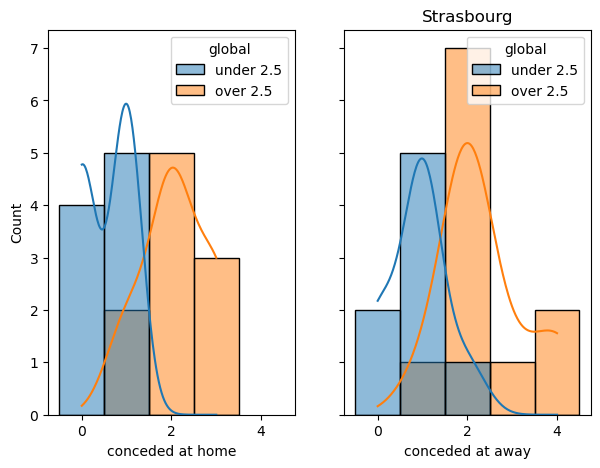

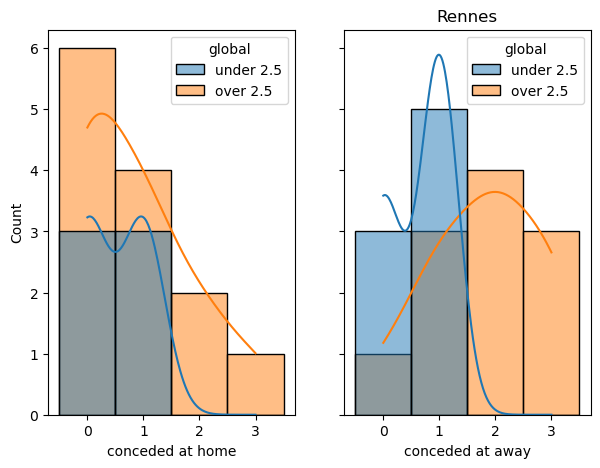

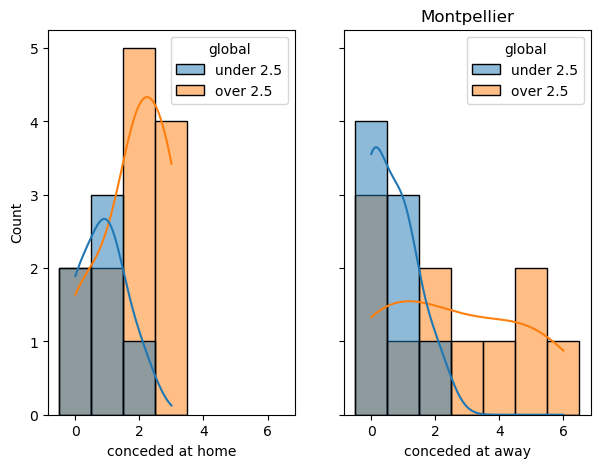

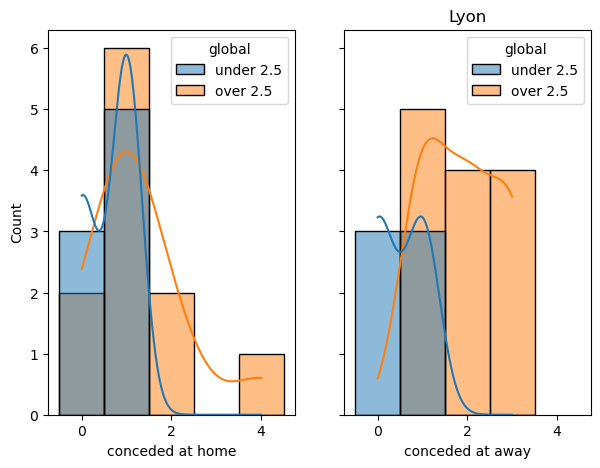

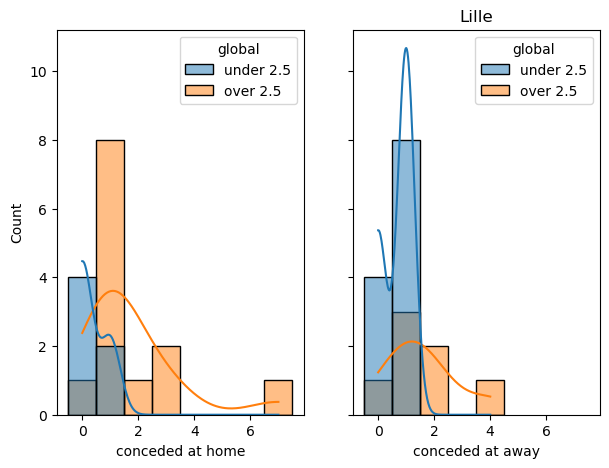

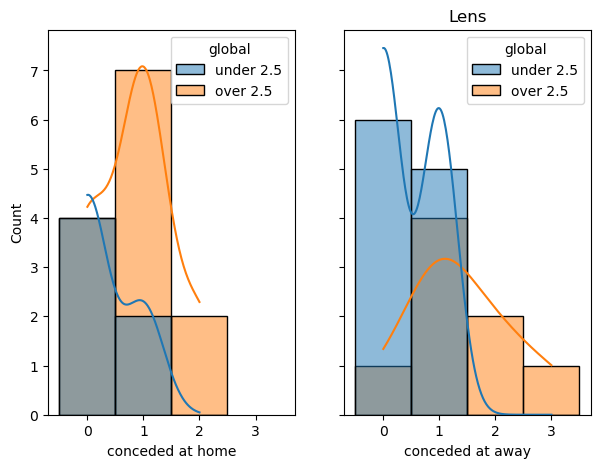

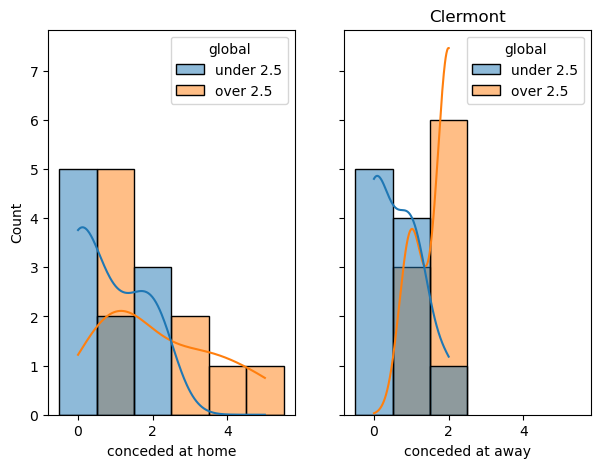

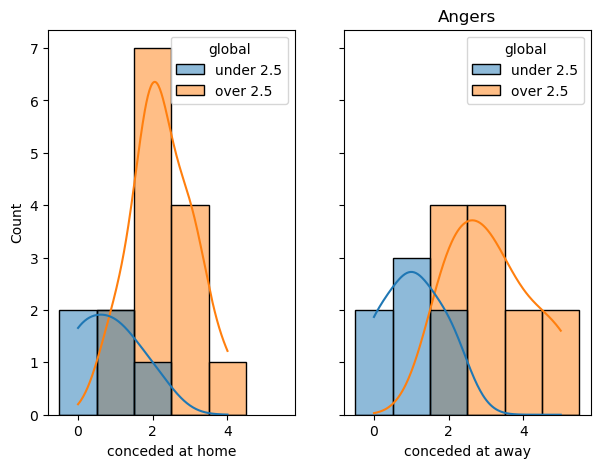

In [94]:
for team in df.home_team.unique():
    feature_viz(team, feature='conceded')

## Target / Feature relationship

In [95]:
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

In [96]:
def rel_feature(team, feature):
    """Observe la rélation entre la target et `feature`

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.scatterplot(data=home, x=home['global'], y=home[f'home_team_{feature}'], hue=home['class'],
                    ax=axs[0])
    axs[0].set_xlabel('global at home')
    axs[0].set_ylabel(f'{feature} at home')
    sns.scatterplot(data=away, x=away['global'], y=away[f'away_team_{feature}'], hue=away['class'],
                    ax=axs[1])
    axs[1].set_xlabel('global at away')
    axs[1].set_ylabel(f'{feature} at away')
    plt.title(team)
    plt.suptitle(f'Target / {feature} relationship')
    plt.show()

#### [ Target | Scored ]

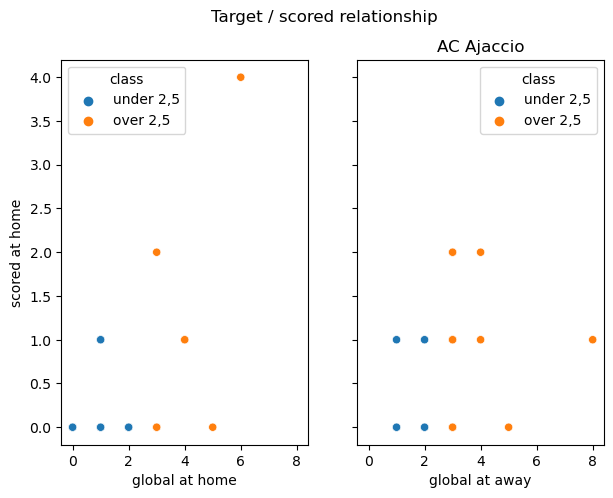

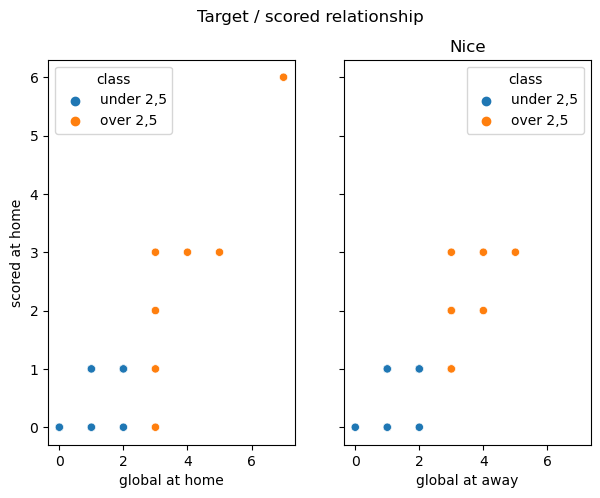

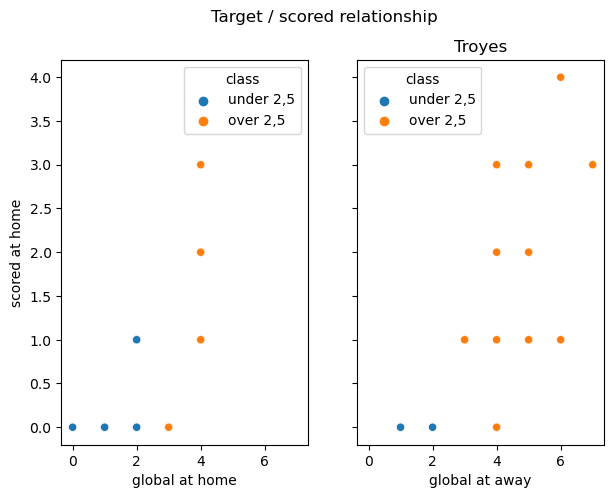

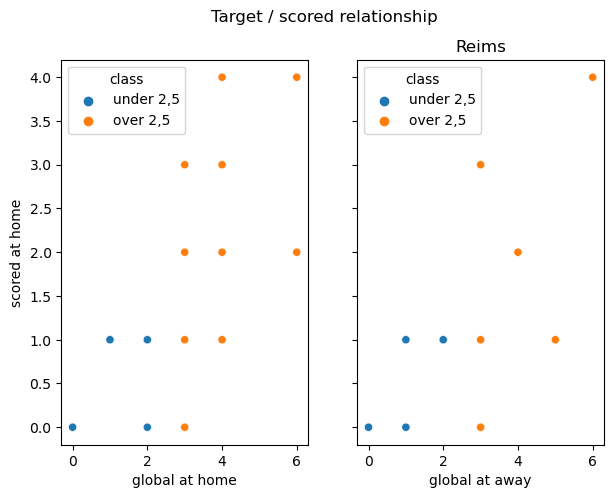

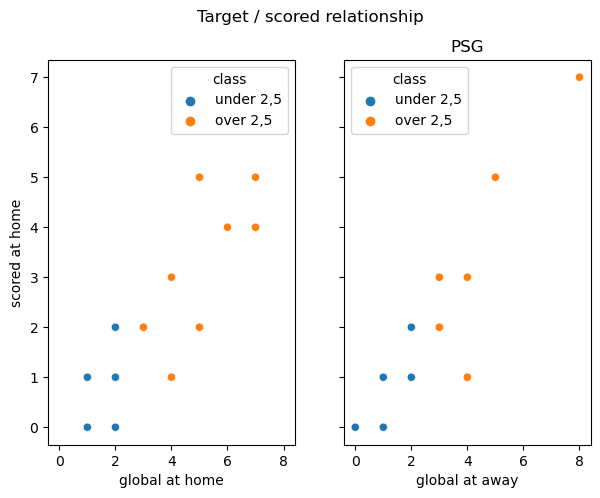

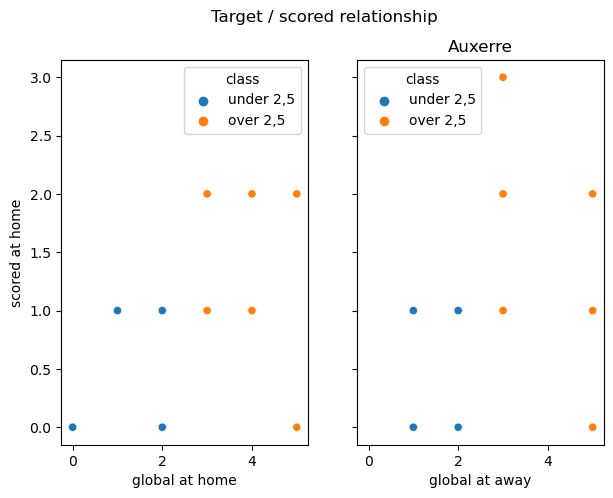

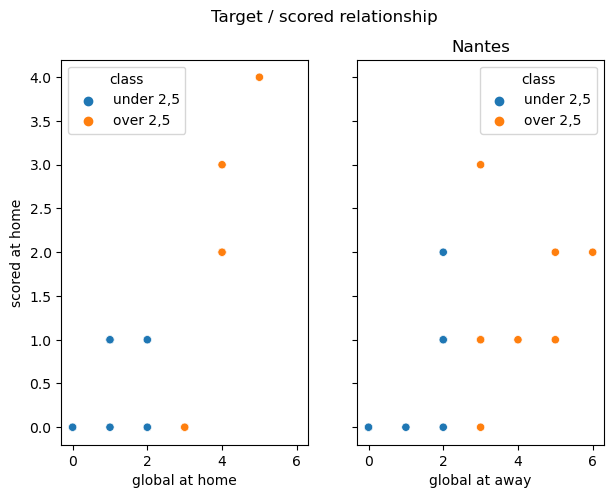

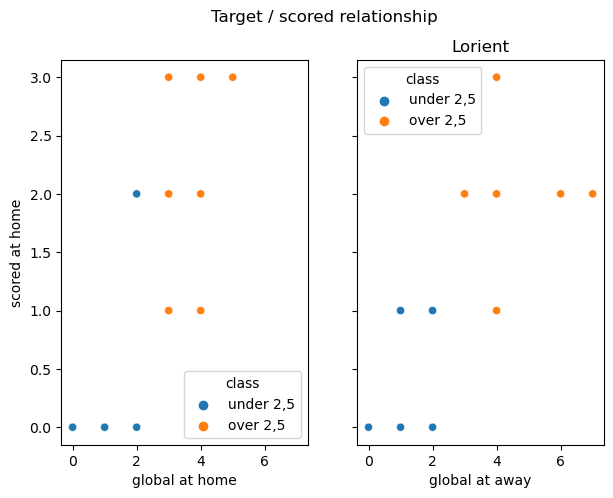

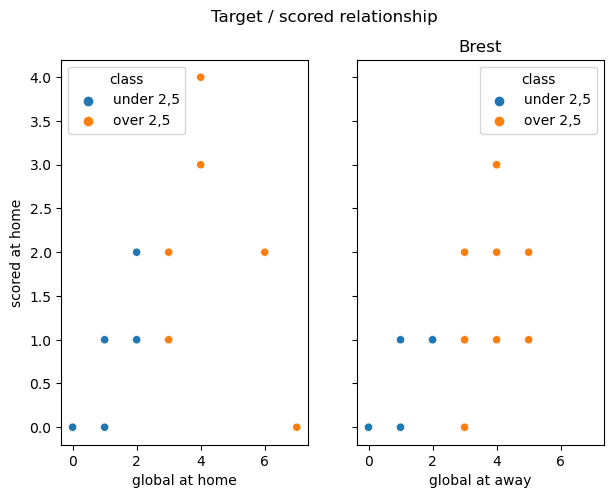

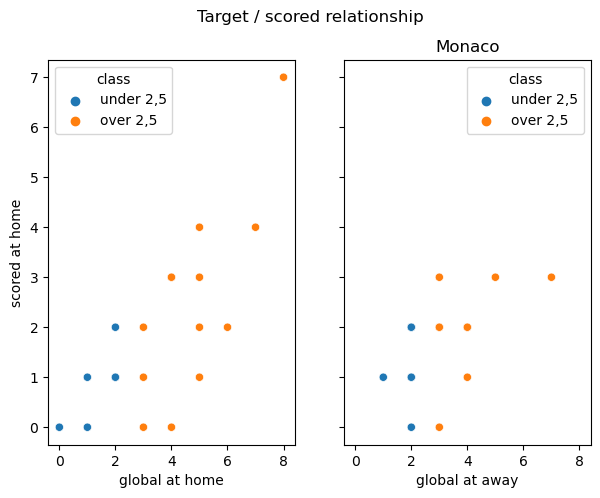

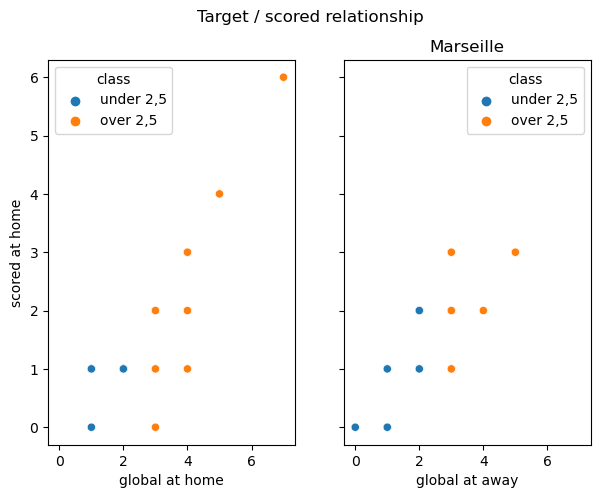

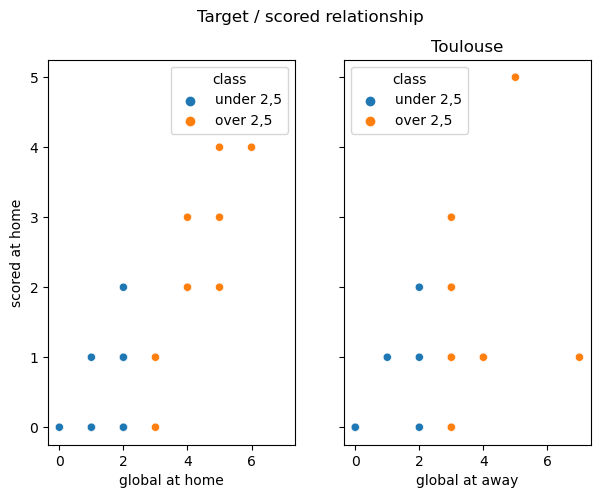

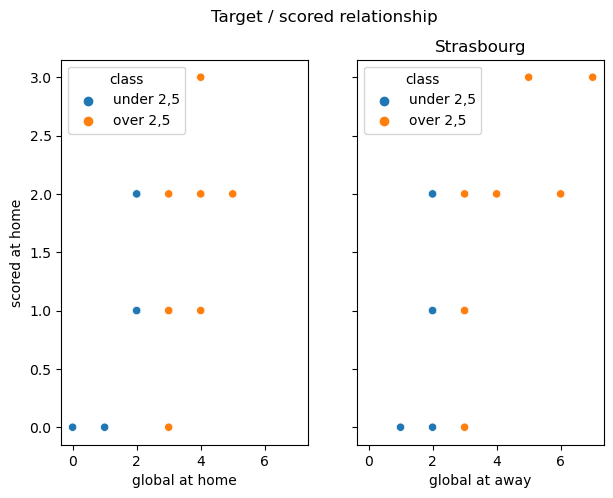

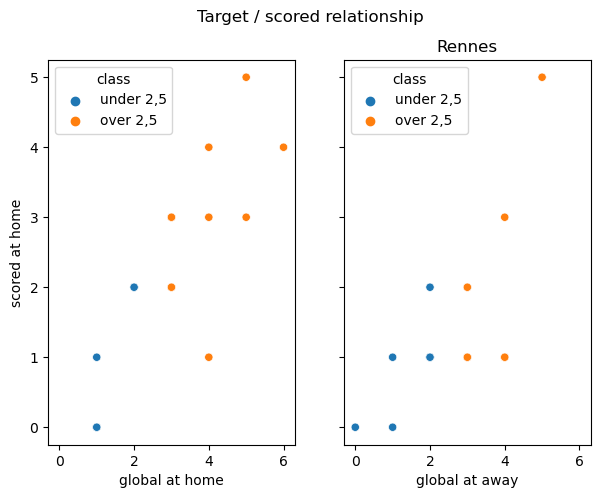

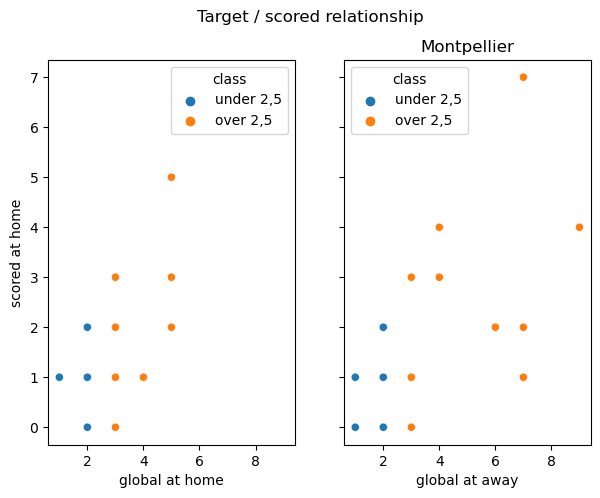

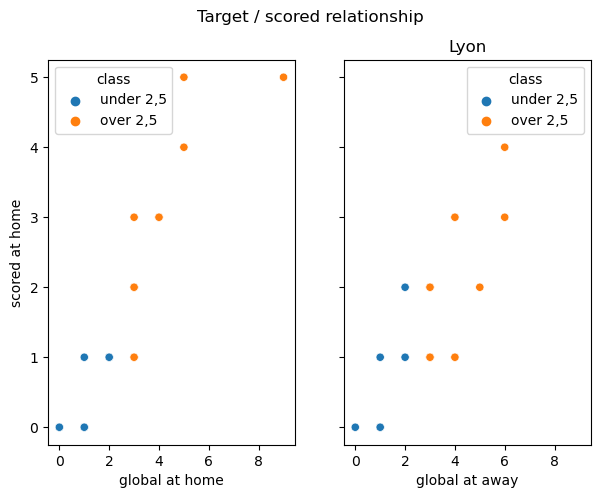

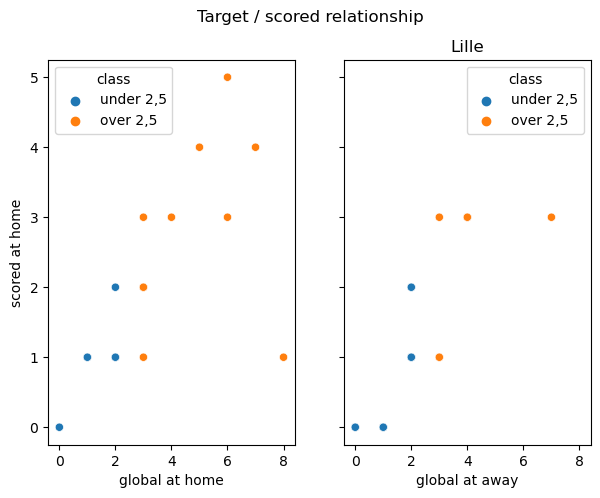

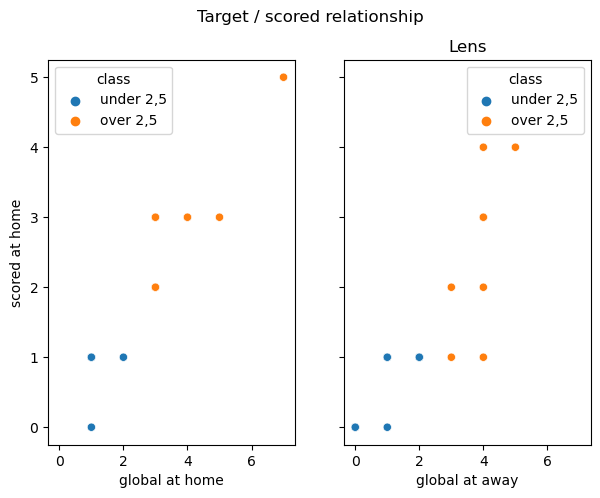

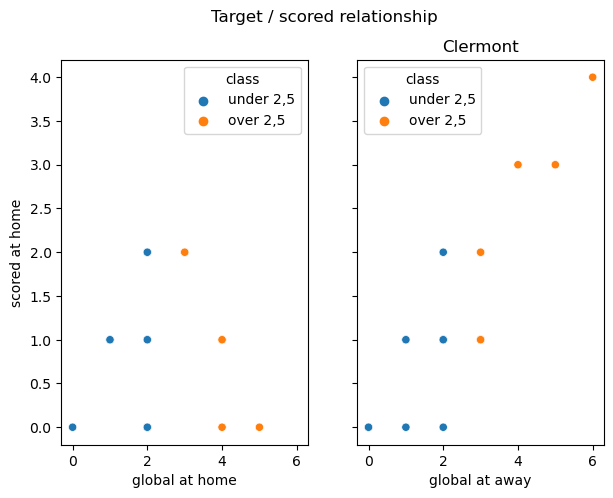

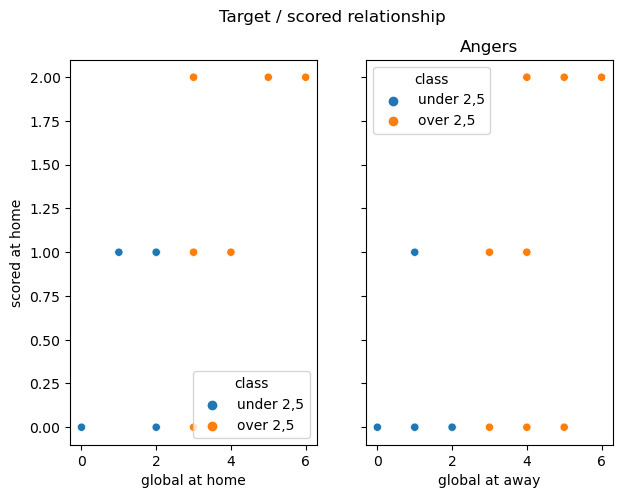

In [97]:
for team in df.home_team.unique():
    rel_feature(team, feature='scored')

#### [ Target | Conceded ]

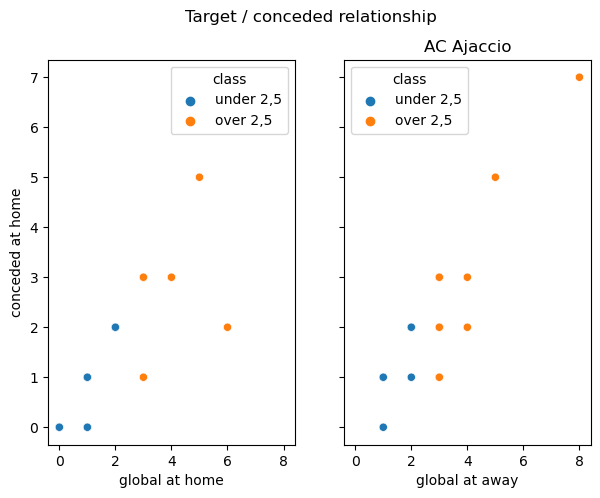

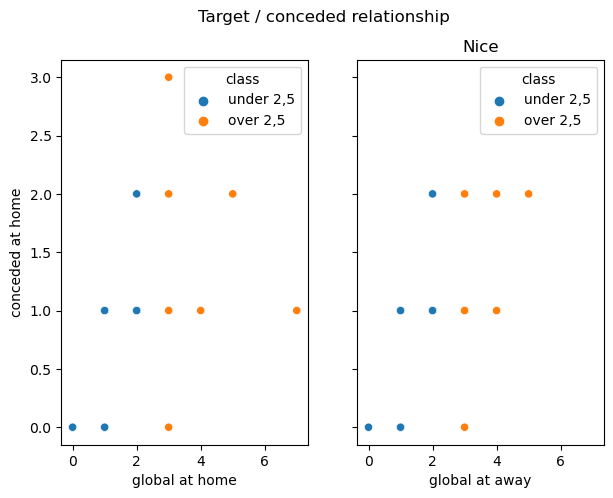

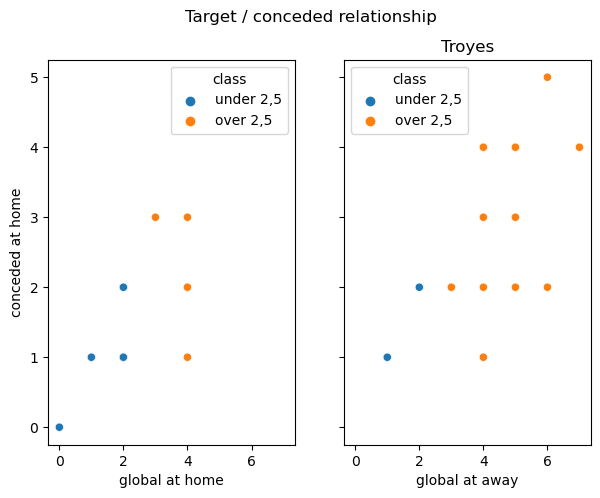

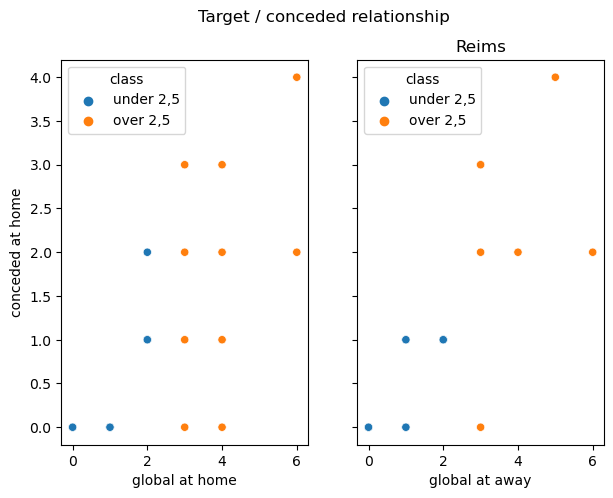

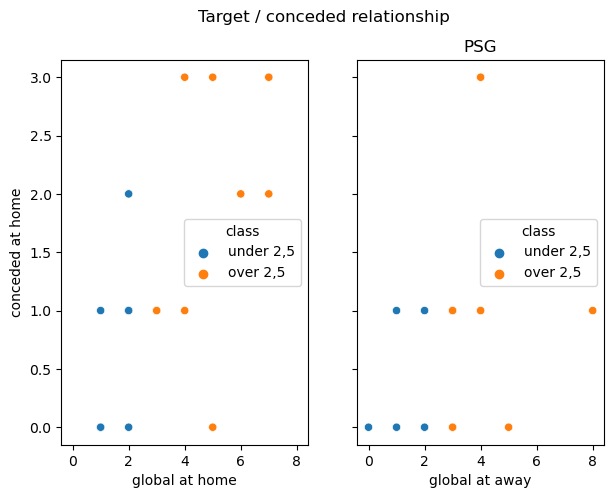

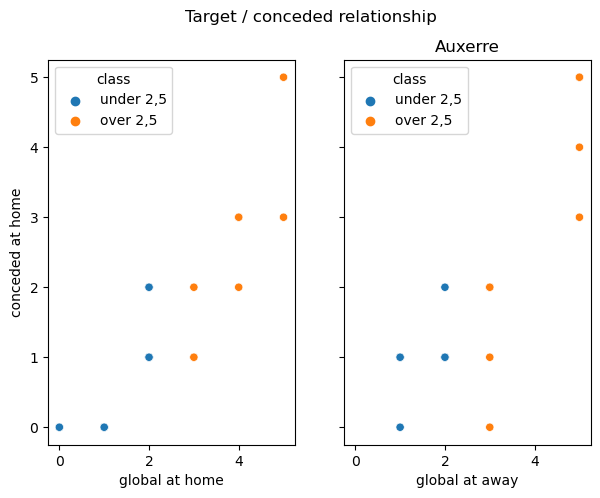

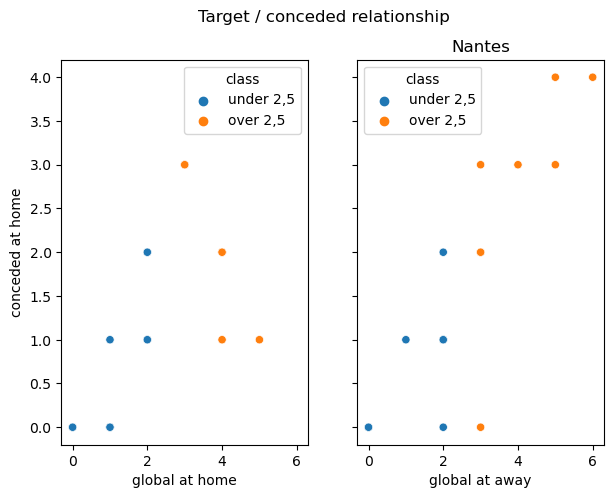

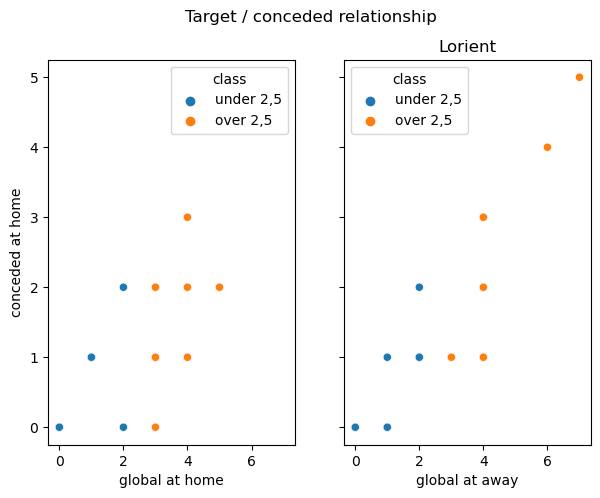

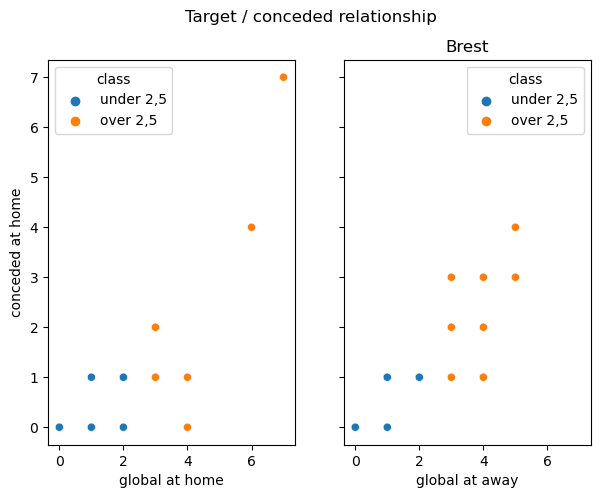

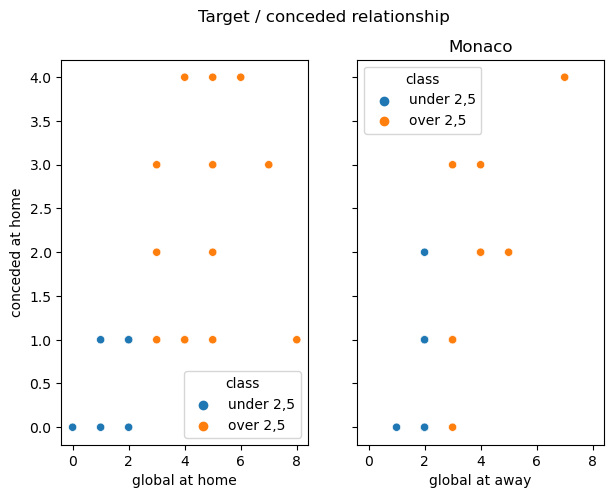

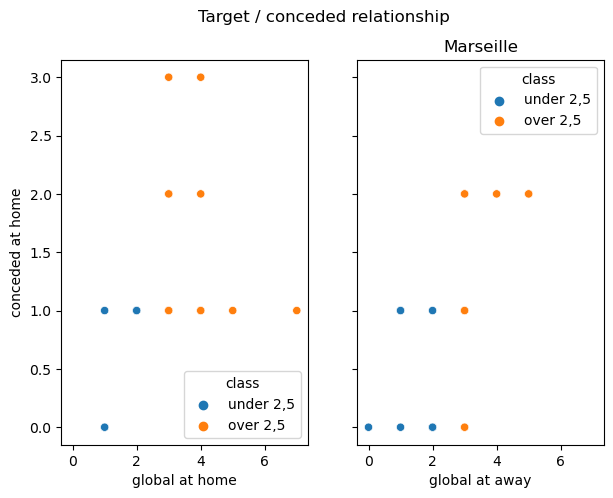

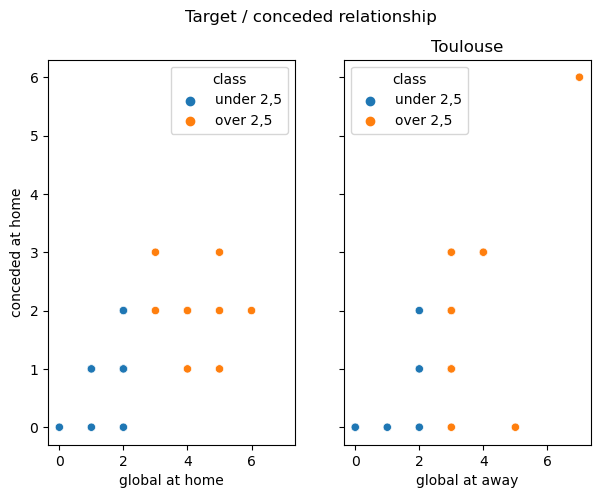

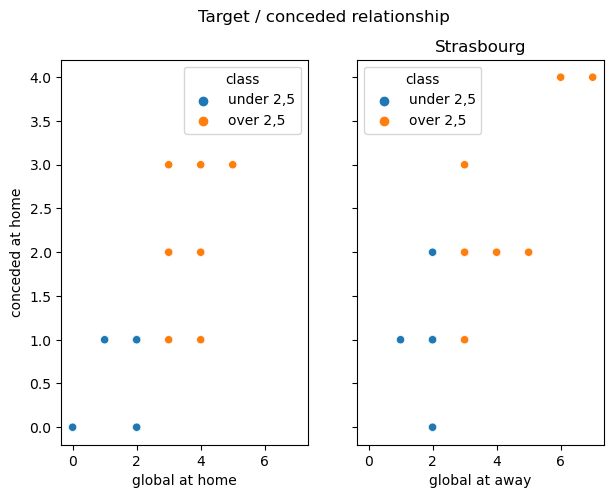

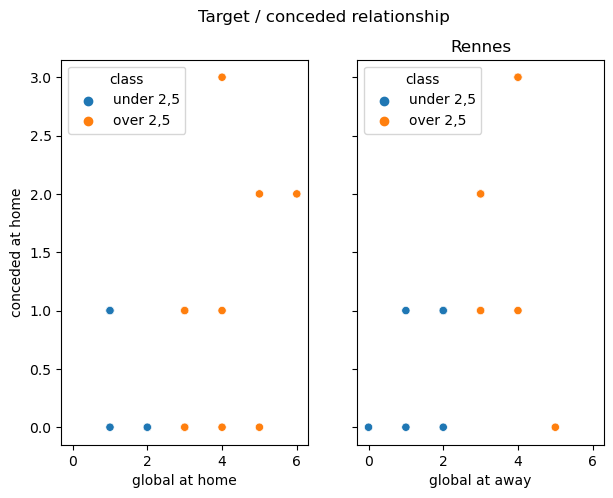

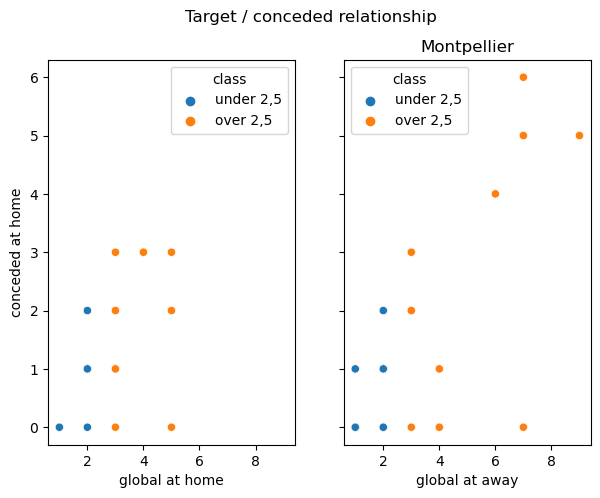

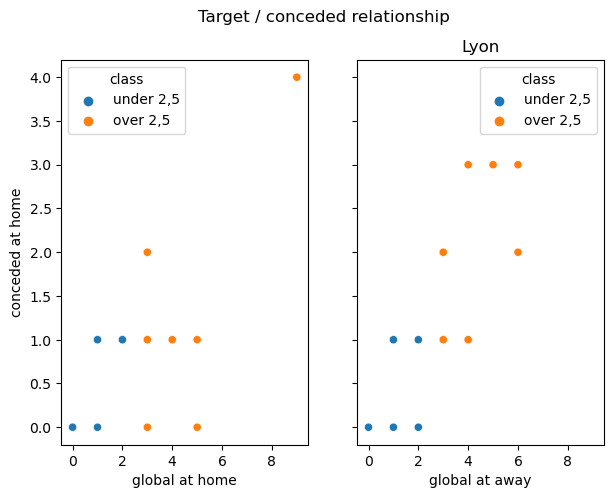

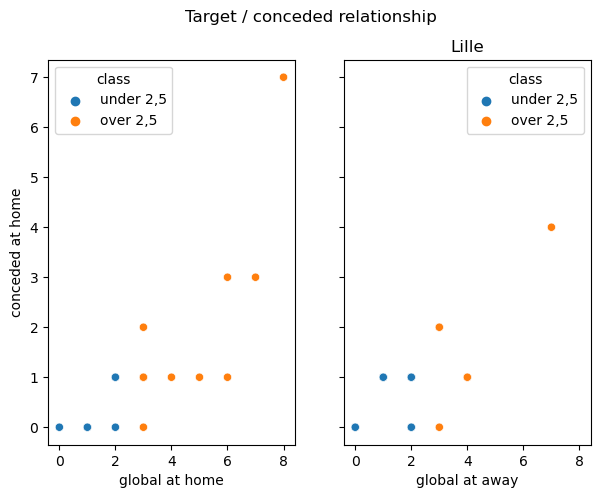

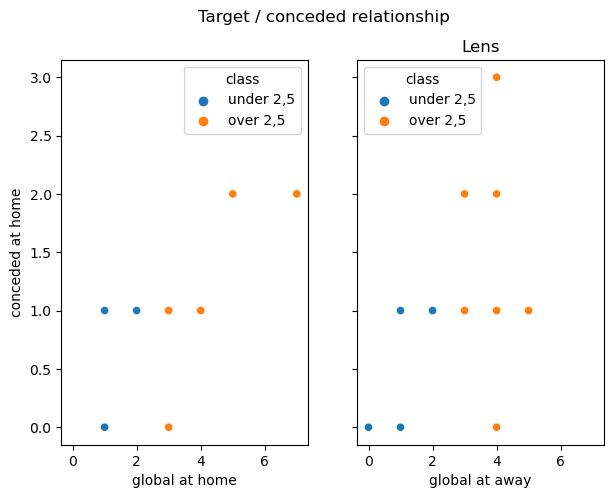

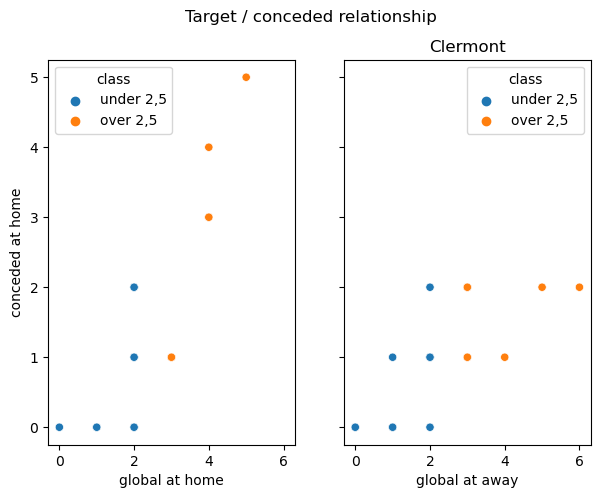

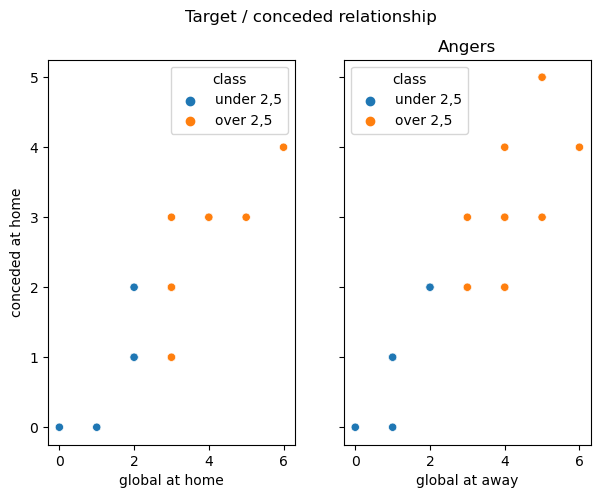

In [98]:
for team in df.home_team.unique():
    rel_feature(team, feature='conceded')

## Feature / Feature Relationship
### [lScored / Conceded ]

In [99]:
def rel_ff(team):
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,5))
    sns.scatterplot(data=home, x=home['home_team_scored'], y=home['home_team_conceded'], ax=axs[0],
                    hue=home['class'])
    axs[0].set_xlabel('scored at home')
    axs[0].set_ylabel('conceded at home')
    sns.scatterplot(data=away, x=away['away_team_scored'], y=away['away_team_conceded'], ax=axs[1],
                    hue=away['class'])
    axs[1].set_xlabel('scored at away')
    axs[1].set_ylabel('conceded at away')
    plt.suptitle(team)
    plt.show()

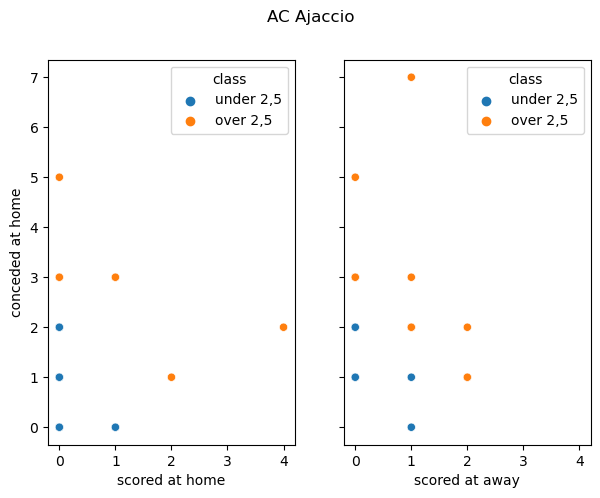

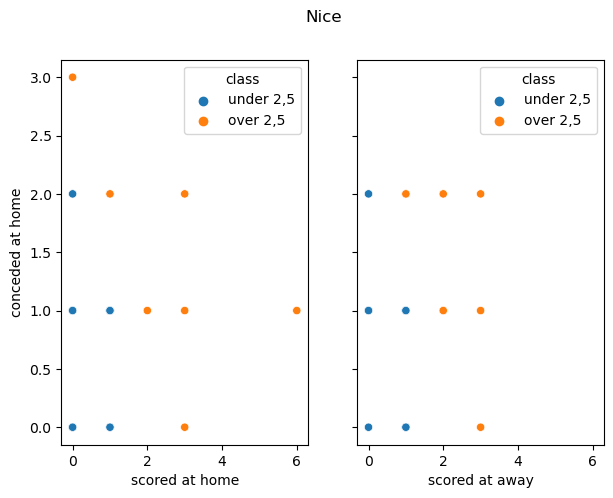

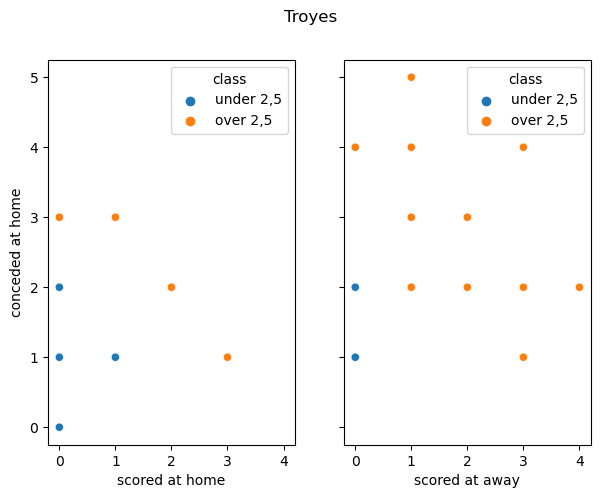

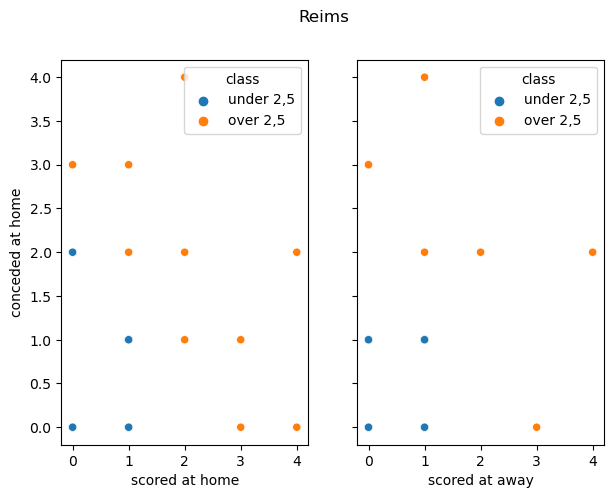

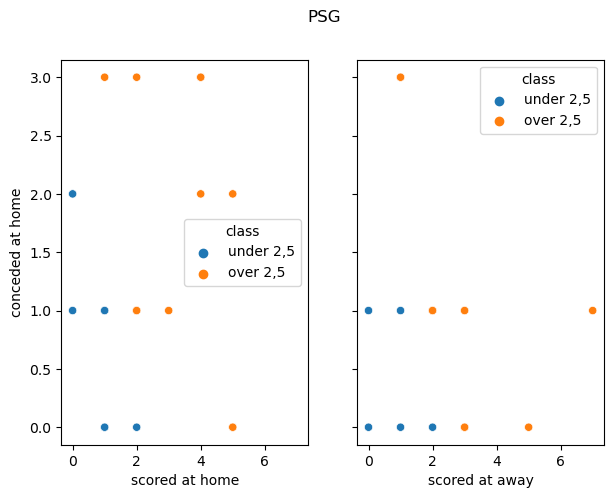

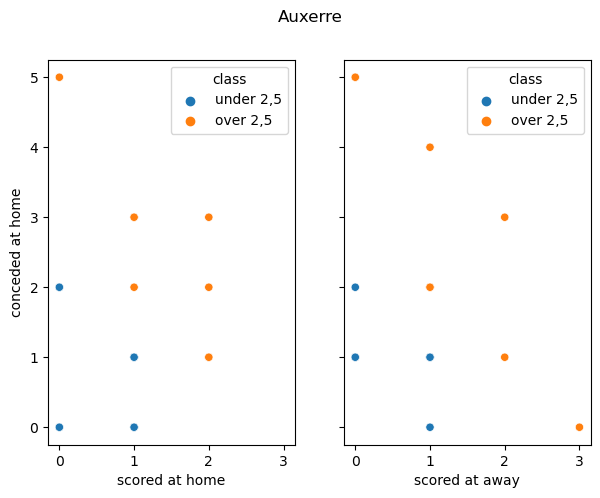

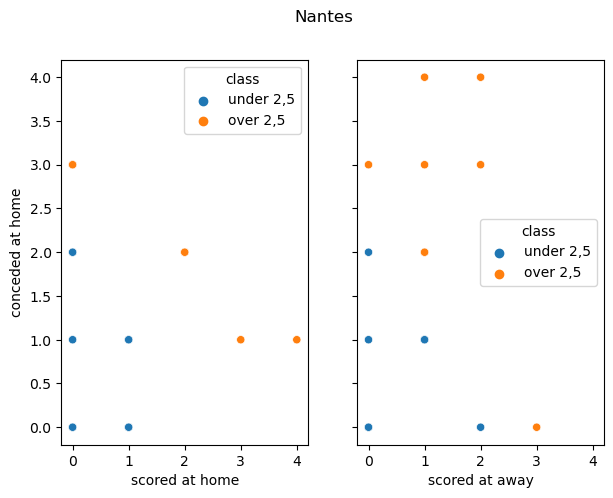

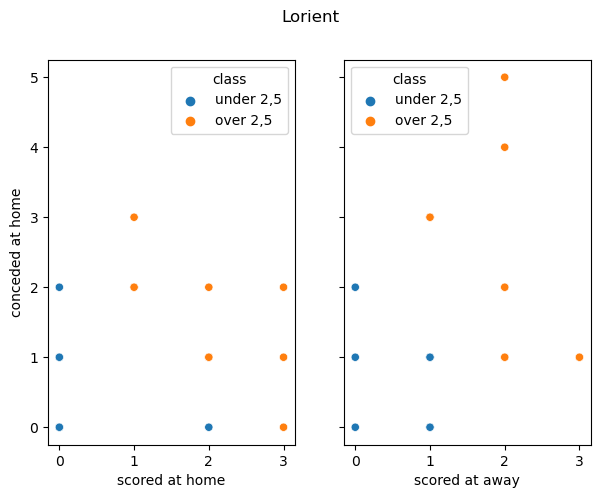

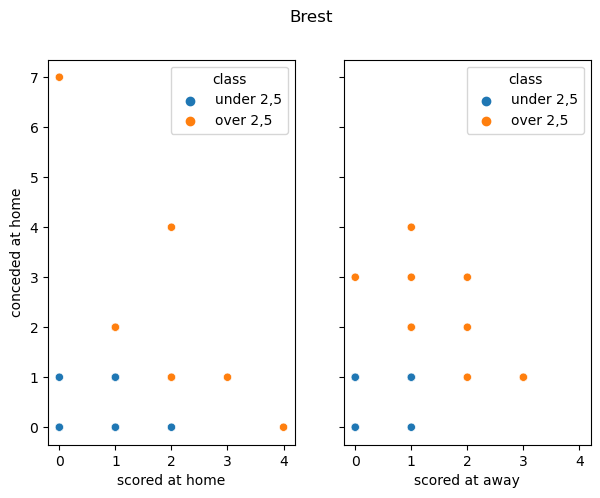

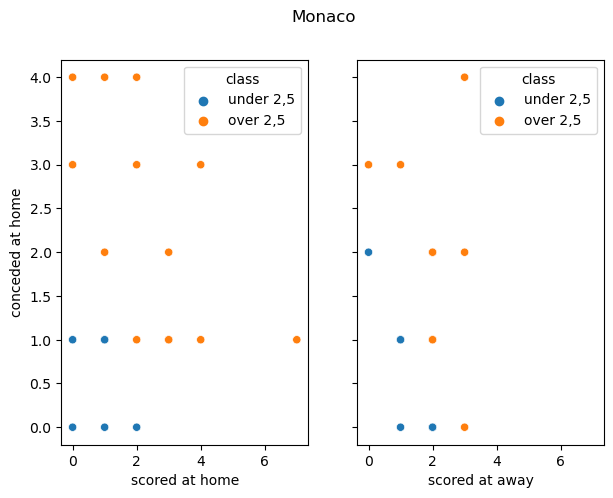

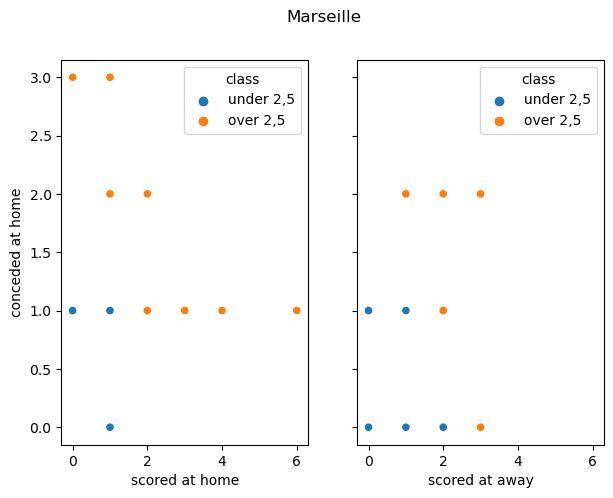

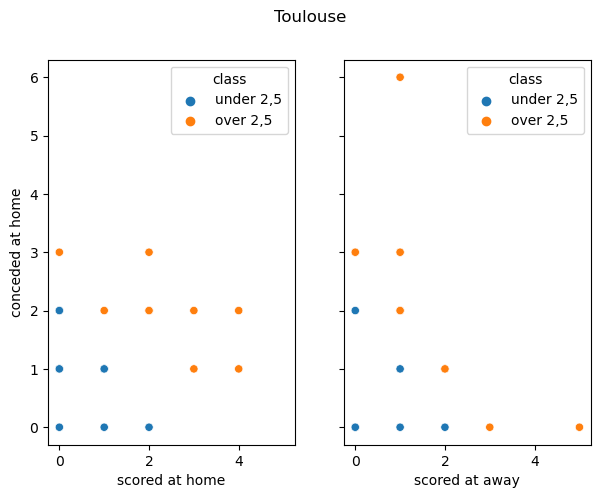

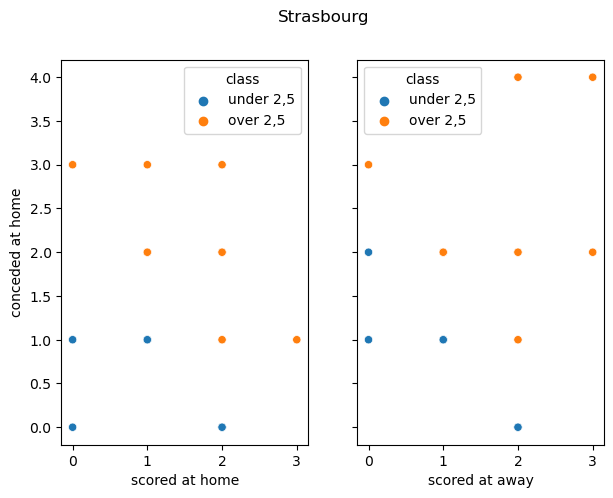

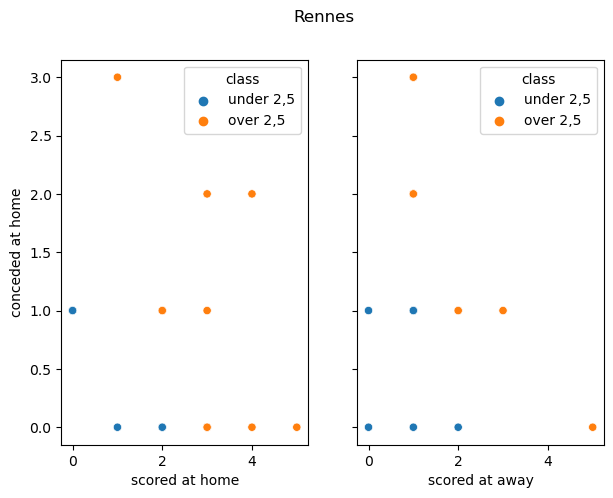

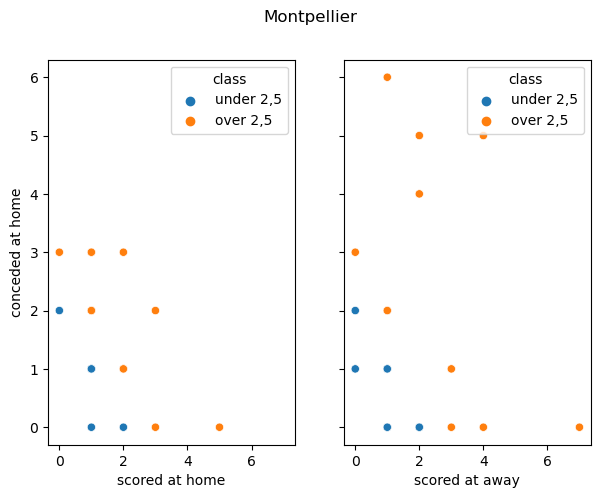

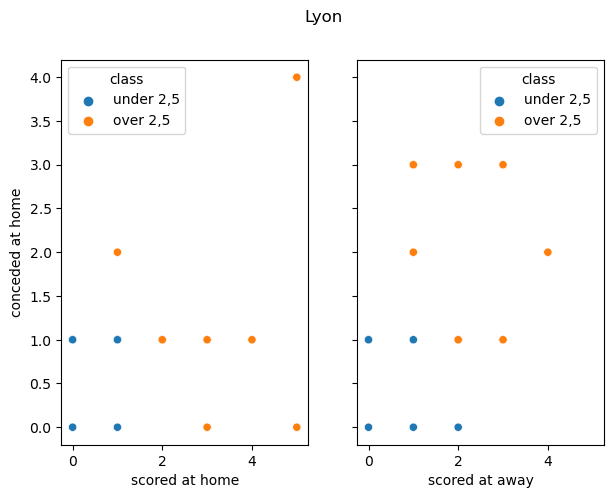

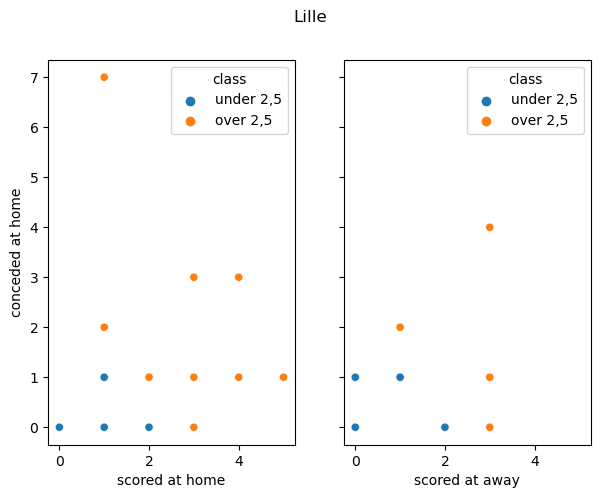

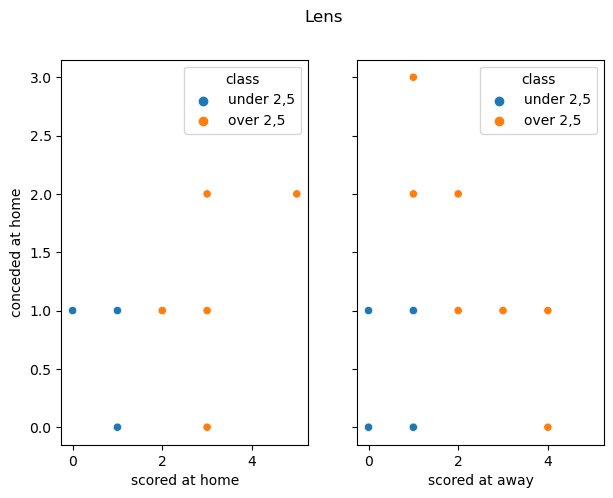

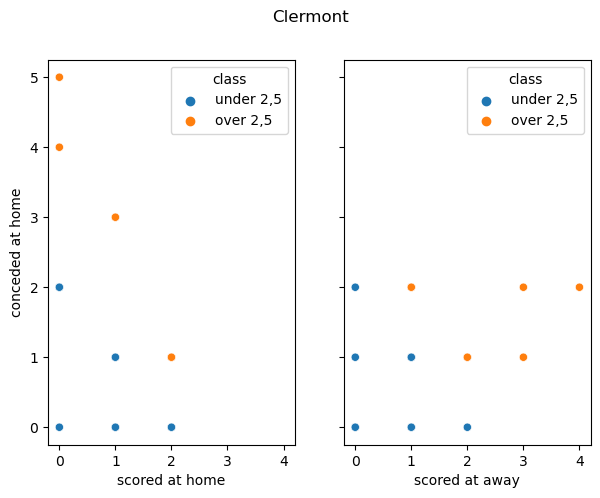

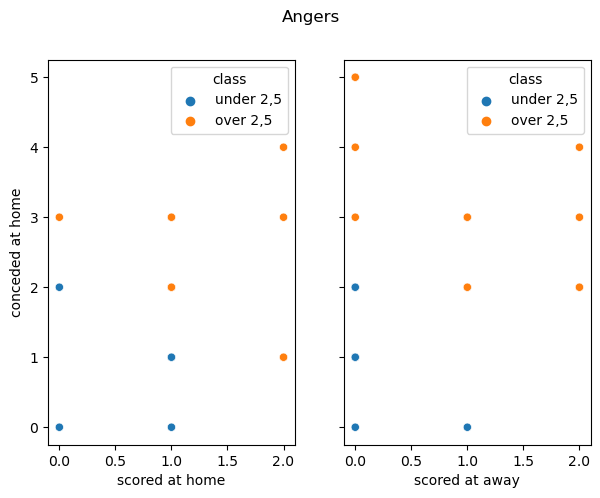

In [100]:
for team in df.home_team.unique():
    rel_ff(team)


### Average observation (features)

In [101]:
at_home = df.groupby('home_team')[['home_team_scored', 'home_team_conceded']].mean()
at_away = df.groupby('away_team')[['away_team_scored', 'away_team_conceded']].mean()
overall = pd.concat([at_home, at_away], axis=1, ignore_index=False)
overall.columns

Index(['home_team_scored', 'home_team_conceded', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

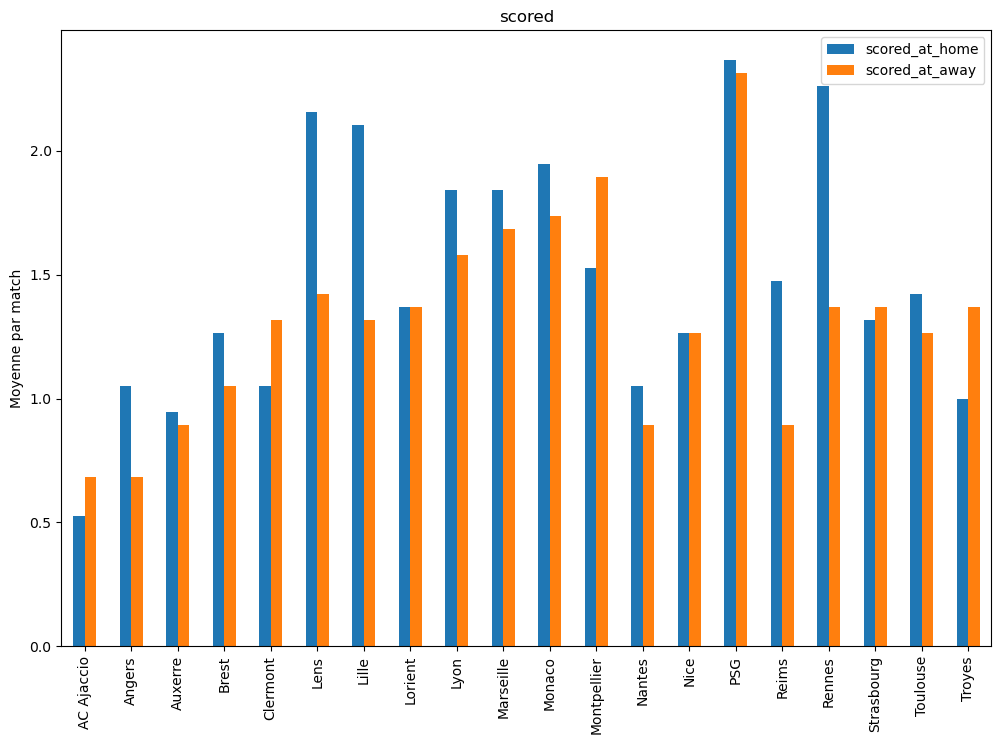

In [102]:
plt.figure()
fig = overall.drop(['home_team_conceded', 'away_team_conceded'],
                   axis=1).rename(columns=({'home_team_scored':'scored_at_home',
                                            'away_team_scored':'scored_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('scored')
plt.show()

<Figure size 640x480 with 0 Axes>

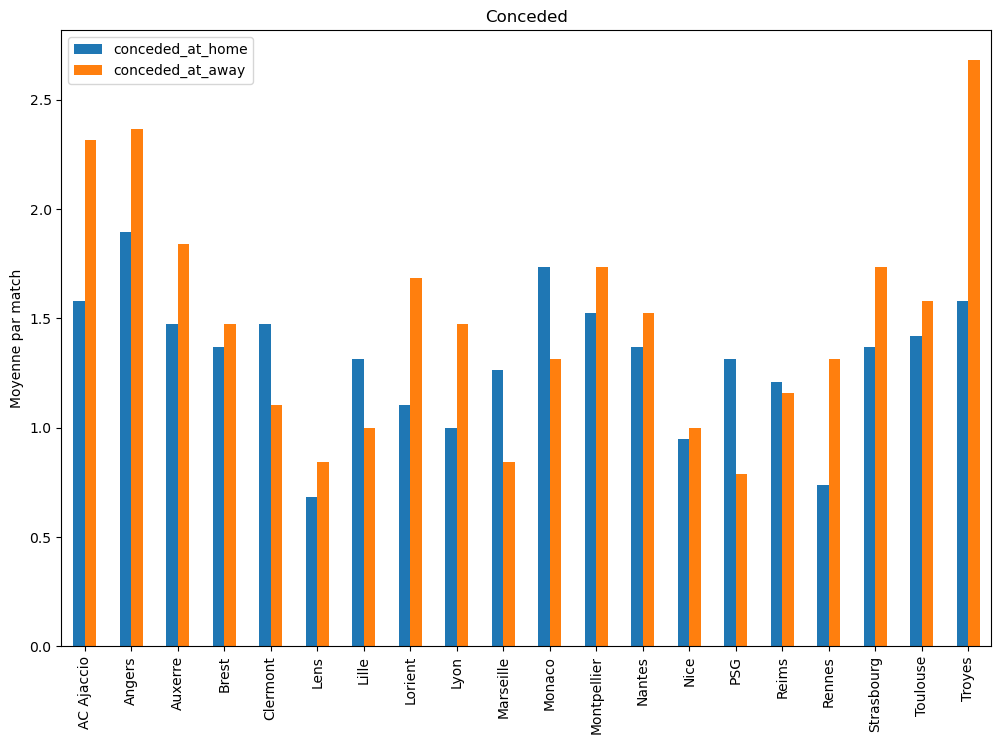

In [103]:
plt.figure()
fig = overall.drop(['home_team_scored', 'away_team_scored'],
                   axis=1).rename(columns=({'home_team_conceded':'conceded_at_home',
                                            'away_team_conceded':'conceded_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('Conceded')
plt.show()

### Subsets creation

In [104]:
strg_attack_ = overall[(overall.home_team_scored > 2)]

bad_attack_good_defense = overall[(overall.home_team_scored < 1.5) & (overall.home_team_conceded < 1.5)]
goodAttack_gooDefense =overall[(overall.home_team_scored > 2) & (overall.home_team_conceded < 1.5)]

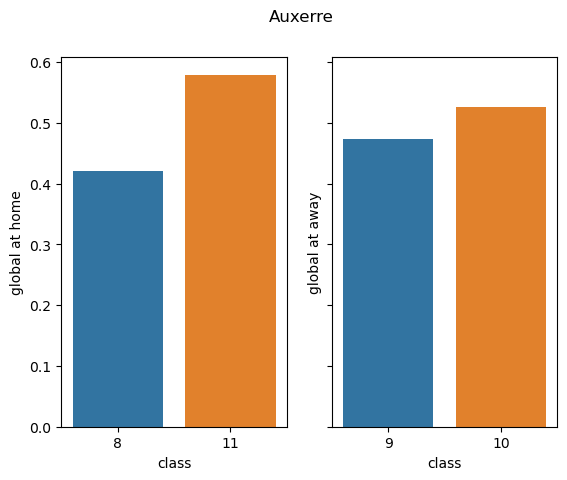

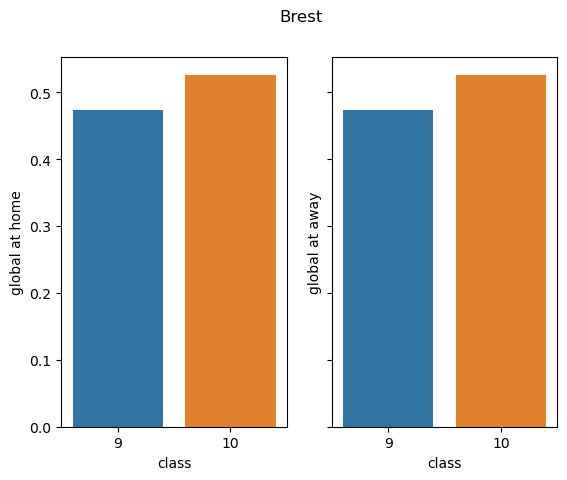

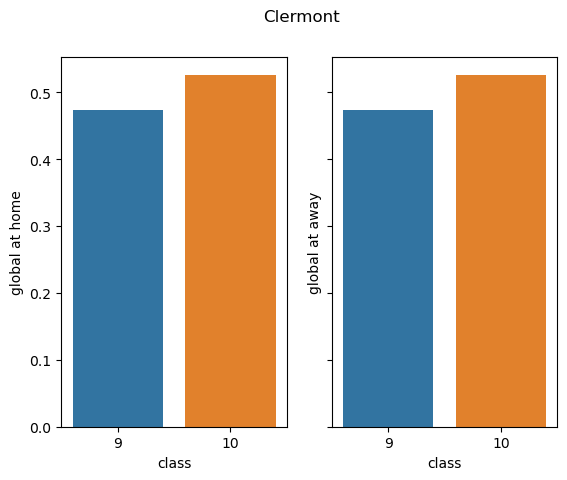

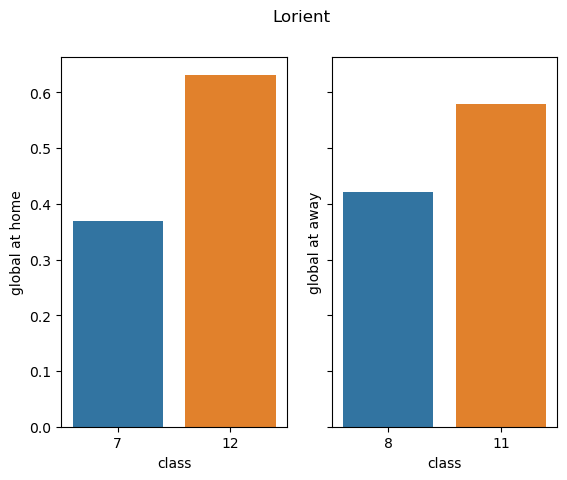

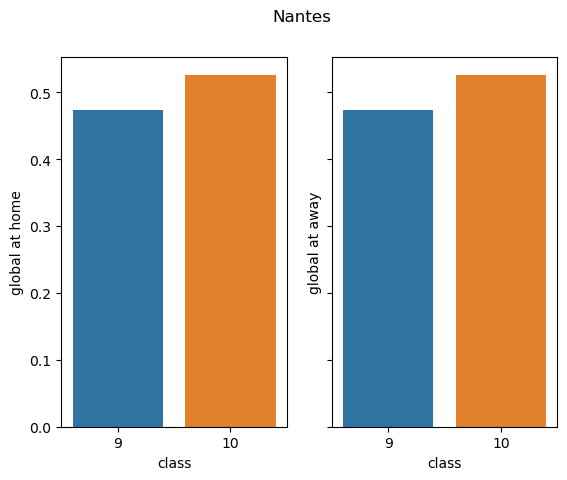

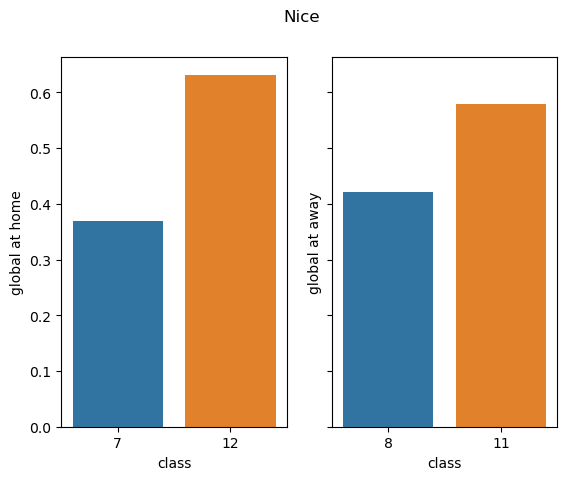

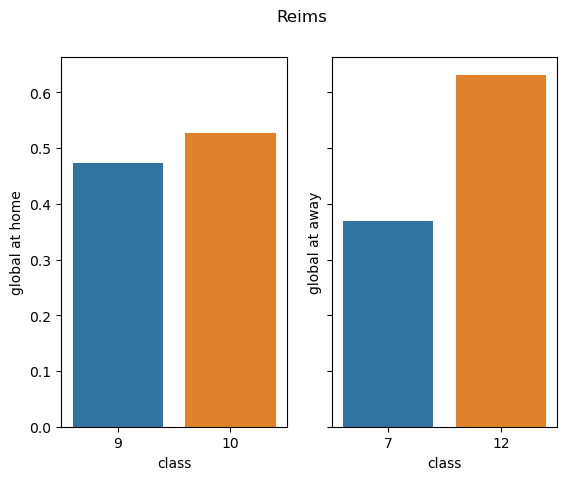

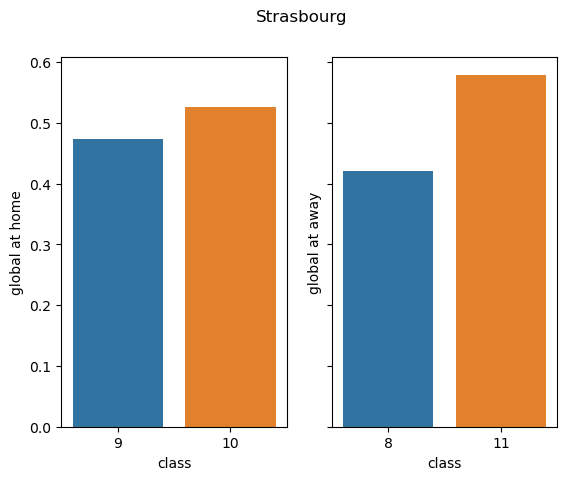

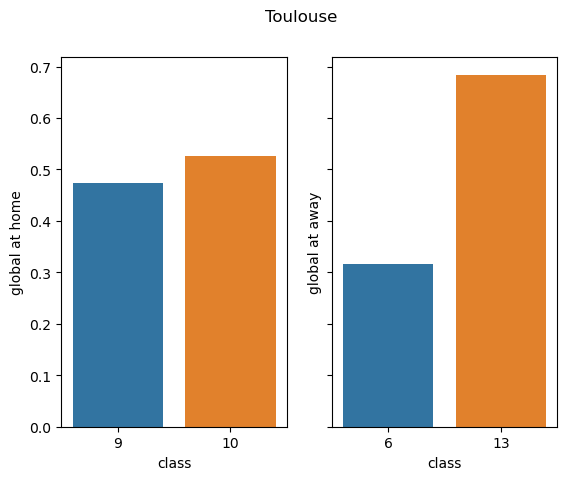

In [105]:
# we gonna observe the under / over rate
for team in bad_attack_good_defense.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()

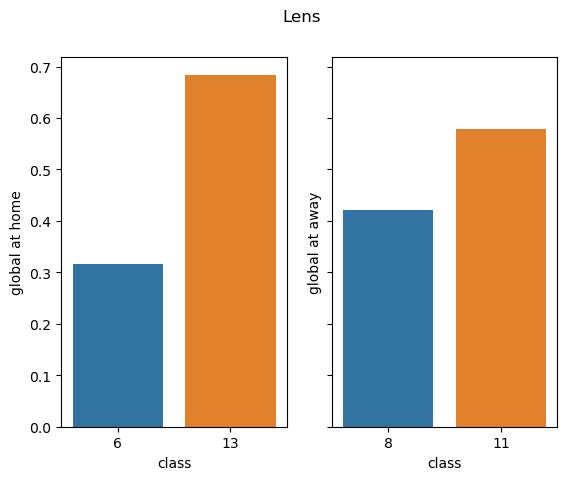

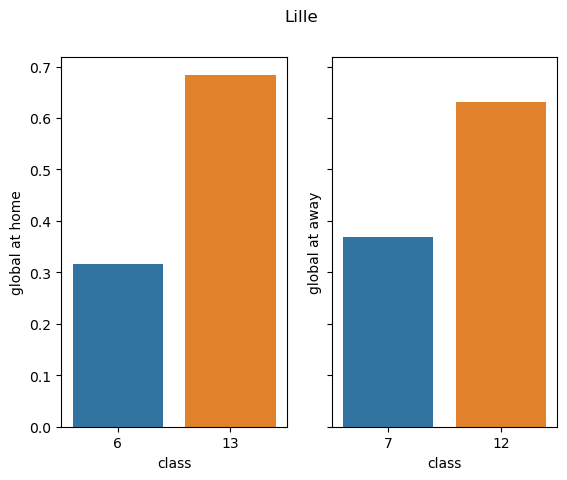

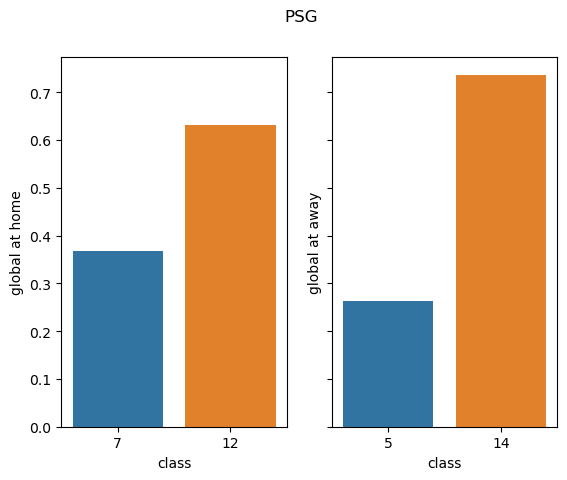

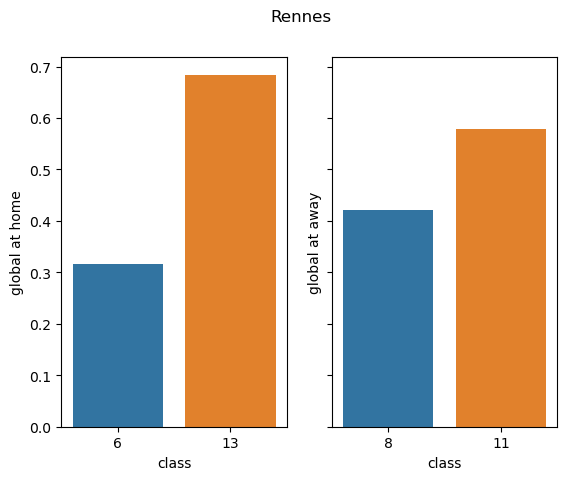

In [106]:
for team in goodAttack_gooDefense.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()

### Correlation 
It seems like the average of goal influence the results,\
We will see the correlation between them and the target

In [107]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df2 = pd.read_csv(path, parse_dates=True, index_col='date_time')
df2.head()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38         PSG     Clermont                   2   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   2               4                   0   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   0               1                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               1                     2   

                     total_away_team_goal  global  
date_time                                          
2023-06-03 19:00:00                     0       1  
2023-06-03 19:00:00                     1       4  
2023-06-03 19:00:00                     1       2  
2023-06-03 19:00:00                     3       4  
2023-06-03 19:00:00                     3       5

### Feature Engineering

In [108]:

def avg_per_match():
    """This function will calculate for each team
    the average of goal after each journée
    """
    data = df2.copy()
    data = data.sort_values(by='journée', ascending=True)
    data.drop(['1st_home_team_goal', '1st_away_team_goal',
               '1st_total_goal', '2nd_home_team_goal', '2nd_away_team_goal',
               '2nd_total_goal'], axis=1, inplace=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_away.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_global_avg'] = at_home.groupby('home_team')['global'].transform(lambda x: x.expanding().mean().shift())
        data['at_global_avg'] = at_away.groupby('away_team')['global'].transform(lambda x: x.expanding().mean().shift())
    return data

In [109]:
dataset = avg_per_match()

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2022-08-05 19:00:00 to 2023-06-03 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   journée               380 non-null    int64  
 1   home_team             380 non-null    object 
 2   away_team             380 non-null    object 
 3   total_home_team_goal  380 non-null    int64  
 4   total_away_team_goal  380 non-null    int64  
 5   global                380 non-null    int64  
 6   ht_scored_avg         360 non-null    float64
 7   ht_conceded_avg       360 non-null    float64
 8   at_scored_avg         360 non-null    float64
 9   at_conceded_avg       360 non-null    float64
 10  ht_global_avg         360 non-null    float64
 11  at_global_avg         360 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 38.6+ KB


In [111]:
# dataset.drop(['total_home_team_goal', 'total_away_team_goal'], axis=1, inplace=True)
dataset = dataset[dataset['journée']>2]

In [122]:
def correlation(data, team):
    dataset = data.copy()
    dataset.drop('journée', axis=1, inplace=True)
    at_home = dataset[dataset['home_team']==team]
    at_home.rename(columns={'total_home_team_goal':'ht_scored / at_conceded',
                    'total_away_team_goal':'ht_conceded / at_scored'}, inplace=True)
    at_away = dataset[dataset['away_team']==team]
    fig, axs = plt.subplots(figsize=(10,5))
    sns.heatmap(at_home[['ht_scored / at_conceded', 'ht_conceded / at_scored',
                         'ht_scored_avg', 'ht_conceded_avg',
                         'at_scored_avg', 'at_conceded_avg', 'global',
                         'ht_global_avg', 'at_global_avg']].corr(),
                annot=True)
    plt.suptitle(f'{team}: At home' )
    plt.show()
    


/tmp/ipykernel_5089/4047677250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.rename(columns={'total_home_team_goal':'ht_scored / at_conceded',


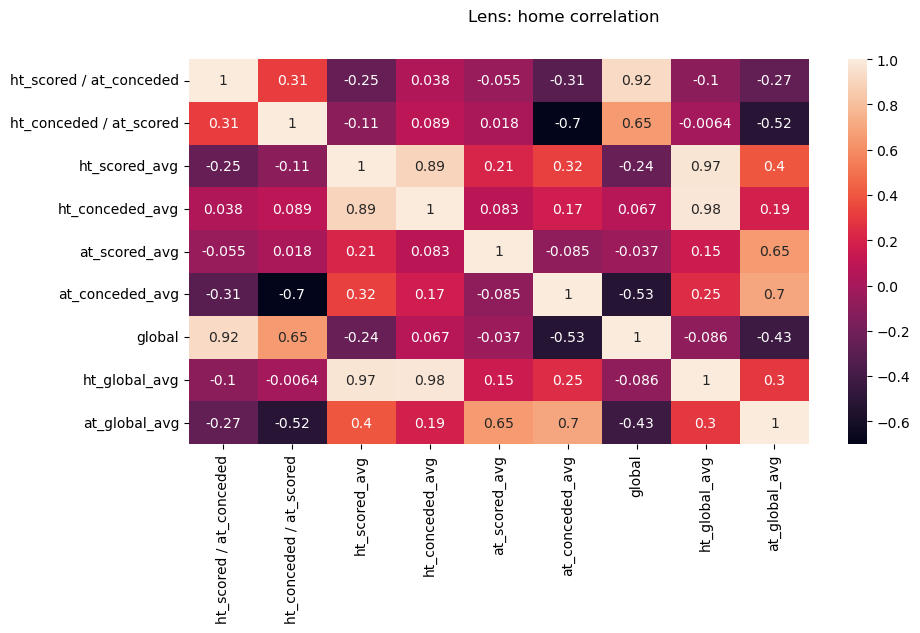

/tmp/ipykernel_5089/4047677250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.rename(columns={'total_home_team_goal':'ht_scored / at_conceded',


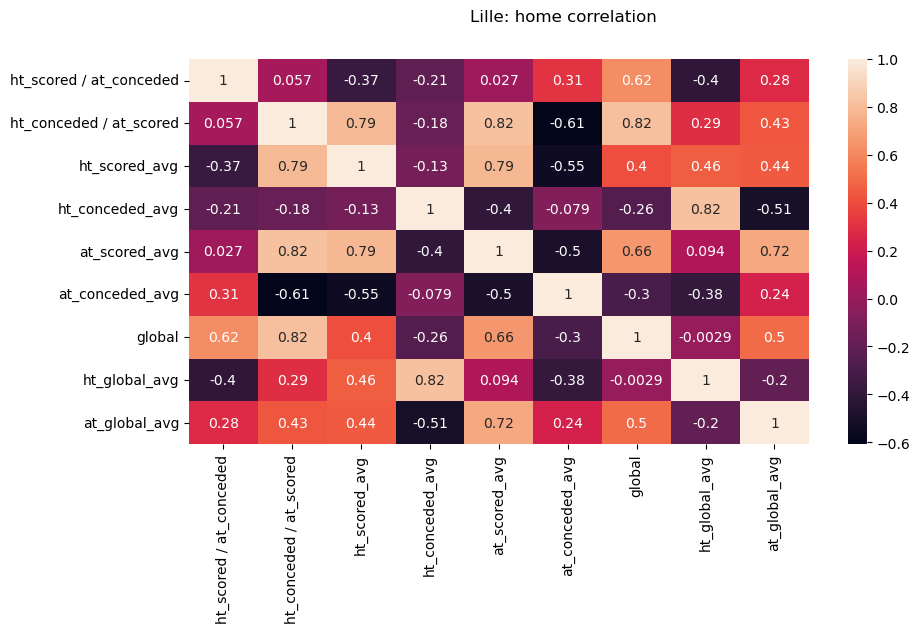

/tmp/ipykernel_5089/4047677250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.rename(columns={'total_home_team_goal':'ht_scored / at_conceded',


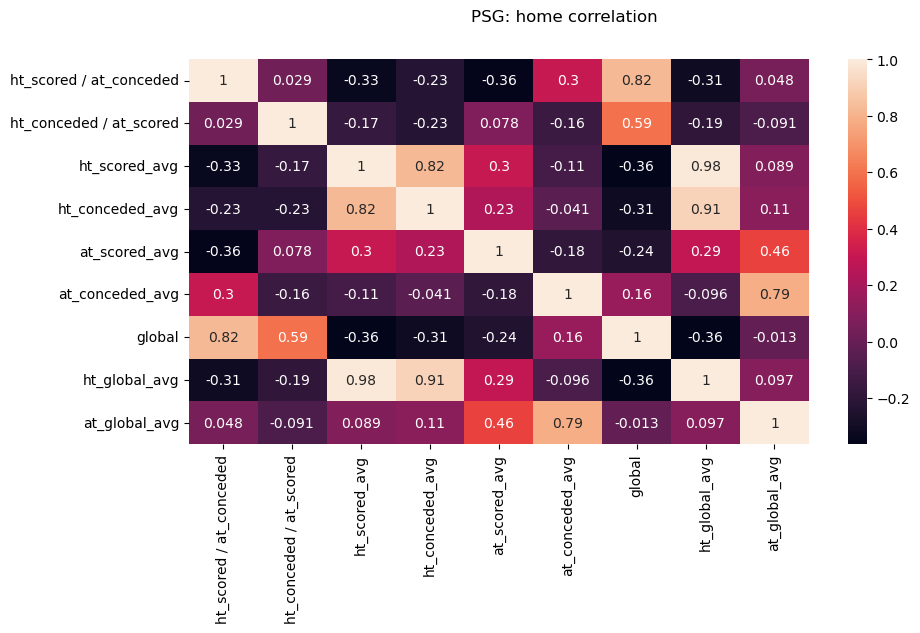

/tmp/ipykernel_5089/4047677250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.rename(columns={'total_home_team_goal':'ht_scored / at_conceded',


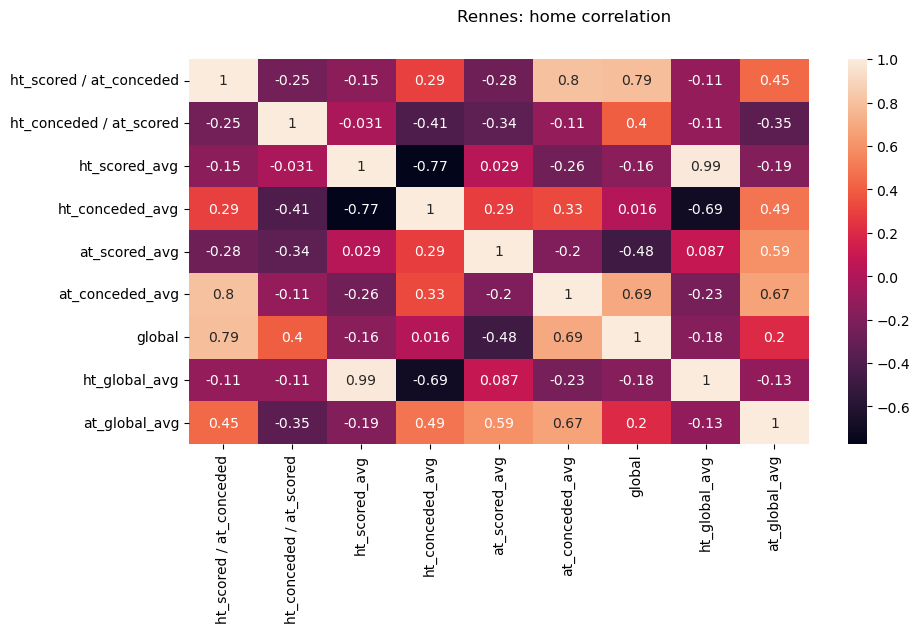

In [123]:
for team in goodAttack_gooDefense.index:
    correlation(dataset, team)